**Assignmnet 1 : Stock Volatility Prediction**

**Group Number : 7**

**Group Members and their student IDs :**
- Anushka Jemima(33617457)
- Shruthi Shashidhara Shastry (33684669)
- Sachin Shivaramaiah (34194037)







Importing all necessary libraries required for data analysis, model building, and evaluation. These include libraries for data manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn), statistical analysis (Statsmodels), and machine learning (scikit-learn), along with specialized tools for feature selection, model validation, and hyperparameter tuning.

In [4]:
#Import all necessary Libraries for data analysis, model building, and evaluation

# Standard data manipulation and visualization libraries

# numerical operations and array manipulations
import numpy as np
# data handling and manipulation (DataFrames)
import pandas as pd
# For plotting data visualizations
import matplotlib.pyplot as plt
# For enhanced data visualizations (heatmaps, distributions)
import seaborn as sns

pd.set_option('display.max_columns', None)

# Sklearn libraries for data preprocessing and model building

# For scaling and encoding features
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder
# For cross-validation, train/test split, hyperparameter tuning, and model validation
from sklearn.model_selection import KFold,train_test_split,RandomizedSearchCV,cross_val_score
# For Lasso regression and cross-validated Lasso
from sklearn.linear_model import Lasso, LassoCV
# For Random Forest regression
from sklearn.ensemble import RandomForestRegressor
# For Support Vector Regressor
from sklearn.svm import SVR
# For calculating model error (RMSE)
from sklearn.metrics import mean_squared_error
# For column-specific transformations
from sklearn.compose import ColumnTransformer
# For building machine learning pipelines
from sklearn.pipeline import Pipeline

# Libraries for feature selection, statistical analysis, and tuning

# For sequential feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
# For statistical analysis and distributions for hyperparameter tuning
from scipy.stats import skew,uniform, loguniform
# For creating iterators for combinations
import itertools
# For advanced statistical models (regression diagnostics)
import statsmodels.api as sm
# To measure the time taken for model training and evaluation
import time


Reading the stock volatility csv file and store it dataset dataframe.

In [6]:
#Read the stock csv
dataset = pd.read_csv("A1_stock_volatility_labeled.csv")

**DATA INSPECTION**

In [7]:
#Lets take a look at the first few rows to understand the data
dataset.head(5)

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,Revenue,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock
0,2022-01-01,164.634,144.954,165.074,136.849,40101533,5.732915e+09,148.347000,-12.188473,1.795721,1.674000e+09,283000000.0,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,1.674000e+09,283000000.0,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,1.674000e+09,283000000.0,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,-155000000.0,-669000000.0,A
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,3.281000e+09,557000000.0,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,-155000000.0,-669000000.0,A


In [8]:
#Lets understand the type of data for each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13486 entries, 0 to 13485
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       13486 non-null  object 
 1   Open                       13486 non-null  float64
 2   Close                      13486 non-null  float64
 3   High                       13486 non-null  float64
 4   Low                        13486 non-null  float64
 5   Volume                     13486 non-null  int64  
 6   Amount                     13486 non-null  float64
 7   Avg_Price                  13486 non-null  float64
 8   Return                     13486 non-null  float64
 9   Volatility                 13486 non-null  float64
 10  Revenue                    13486 non-null  float64
 11  Net Income                 13486 non-null  float64
 12  Gross Profit               13486 non-null  float64
 13  EPS                        13486 non-null  flo

This provides useful information, such as:
 - The total number of entries (13486 rows)
 - The number of non-null values per column (indicating no missing values)
 - Data types of each column (e.g., 'float64' for numeric features, 'object' for dates and categorical data)

This helps us know whether we need to clean or preprocess the data (e.g., convert 'Date' to datetime format).


In [9]:
#Generate a summary statistic for the data set
dataset.describe()

,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,Revenue,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
count,13486.000000,13486.000000,13486.000000,13486.000000,1.348600e+04,1.348600e+04,13486.000000,13486.000000,13486.000000,1.348600e+04,1.348600e+04,1.348600e+04,13486.000000,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04
mean,1741.328666,1735.367690,1829.655853,1637.911281,4.112382e+07,3.228092e+09,1733.197353,-0.700045,2.396125,7.754660e+09,7.171438e+08,2.857836e+09,1.949710,1.821612e+10,1.091715e+10,7.298849e+09,1.510022e+09,1.178012e+09,-7.025812e+08,-4.600039e+08
std,15564.852252,15628.651843,16210.989075,14950.536329,1.211088e+08,1.660591e+10,15573.457915,13.110310,2.033964,3.128756e+10,3.993453e+09,1.130077e+10,5.161378,5.717197e+10,3.217662e+10,2.944286e+10,7.989450e+09,5.928045e+09,3.328101e+09,3.485262e+09
min,0.011000,0.010000,0.011000,0.008000,4.210000e+02,1.746700e+04,0.010455,-84.347826,0.000000,1.400000e+04,-1.672000e+10,-2.746000e+09,-84.600000,1.410000e+07,2.479000e+06,-8.940000e+09,4.300000e+04,-4.109000e+09,-7.097000e+10,-6.976000e+10
25%,22.710000,22.330000,24.750000,20.180000,3.879474e+06,1.125653e+08,22.486262,-6.911791,1.345456,2.733000e+08,-6.500000e+05,1.013000e+08,-0.050000,7.990500e+08,3.497000e+08,2.705000e+08,5.024000e+07,5.240000e+05,-2.515500e+08,-2.350000e+08
50%,87.560000,86.645000,93.975000,81.372500,1.145391e+07,4.743543e+08,87.345952,-1.090276,1.980023,1.040000e+09,6.012000e+07,4.060000e+08,0.990000,2.858000e+09,1.556000e+09,9.840000e+08,1.861000e+08,8.319000e+07,-4.824000e+07,-2.264000e+07
75%,356.460000,352.652750,377.180000,325.060000,3.204557e+07,2.097197e+09,351.217239,4.979387,3.001239,3.500750e+09,3.140000e+08,1.422000e+09,2.860000,9.482000e+09,6.084000e+09,3.111000e+09,5.940000e+08,4.441500e+08,-6.422000e+06,7.465000e+06
max,402207.744000,403313.664000,408310.579000,394660.864000,2.908660e+09,6.206421e+11,402330.624000,480.000000,149.476478,6.113000e+11,8.948000e+10,2.252000e+11,52.470000,5.772000e+11,3.906000e+11,4.035000e+11,1.837000e+11,1.459000e+11,2.138000e+10,2.425000e+10


 Generating summary statistics for the numerical columns in the dataset.
 Key takeaways include:
 - 'count': The number of non-null values (same as in .info(), indicating no missing data).
 - 'mean': The average value of each column, e.g., the average 'Open' price is 1741.33 USD.
 - 'std': Standard deviation, showing how much the values deviate from the mean.
 - 'min' and 'max': Minimum and maximum values, revealing outliers in the data (e.g., 'Open' ranges from 0.01 to 402207.74 USD).
 - 25%, 50% (median), and 75%: These percentile values help us understand the distribution of the data.

From this, we can observe that some features like 'Volume' and 'Amount' have a very wide range, indicating skewness or potential outliers.

In [10]:
df = dataset.copy()

**DATA PRE-PROCESSING**

**Data preprocessing** involves cleaning and transforming raw data into a suitable format for analysis. In this assignment, preprocessing helps ensure that the financial data is properly structured (e.g., converting cumulative data into quarterly values), allowing for more accurate model training and predictions.


Some of our columns are reported as both quaterley and year to date cumulative figures, we want to bring them down to common temporal ground , hence we perfrom some pre processing.
For features like Revenue, Net Income, and Operating Cash Flow, which are recorded cumulatively, the data is transformed into quarterly values using the .diff() method. This ensures that financial data is aligned to a common time scale (quarterly).



In [11]:
#This function takesa stock group as input and the field and returns the new column after processing.
def process_financial_data(group, field_name, fill_na_value=0):
    #Convert cumulative to quarterly values
    group[field_name + '_Quarterly'] = group[field_name].diff().fillna(group[field_name])

    #Manage the reset to zero at the beginning of each new fiscal year
    def handle_reset(row):
        if row.name == group.index.min():
            return row[field_name]
        elif group[field_name].loc[row.name] < group[field_name].loc[group.index[group.index.get_loc(row.name) - 1]]:
            return row[field_name]
        else:
            return row[field_name + '_Quarterly']

    group[field_name + '_Quarterly'] = group.apply(handle_reset, axis=1)

    #Fill all months within the quater with the same value
    group[field_name + '_Quarterly'] = group[field_name + '_Quarterly'].replace(0, np.nan).ffill()

    #Fill any na values with 0
    group.fillna(fill_na_value, inplace=True)

    # Drop the original cumulative column
    group.drop(columns=[field_name], inplace=True)

    return group

# Fields that are updated quaterly and year to date cumulative values
fields = ['Revenue', 'Net Income', 'Gross Profit', 'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow']

# Apply the process to each stock separately
for field in fields:
    df = df.groupby('Stock', group_keys=False).apply(lambda group: process_financial_data(group, field))




The above code processes cumulative financial data by converting it into quarterly values. It calculates the difference between consecutive months to derive quarterly values for fields like 'Revenue' and 'Net Income'. Additionally, it handles fiscal year resets, fills missing values, and ensures the same quarterly value is applied across all months within a quarter.


In [12]:
#This function takes the stock group and the EPS column as an input and returns the new updated columns
def process_eps_data(group, eps_column):
  #Since the EPS column updates quaterley and has a trailing twelve months (TTM) figure we want to leverage both hence we seperate the columns
    # Separate Quarterly EPS and TTM EPS
    group[eps_column + '_Quarterly'] = group[eps_column]

    # Calculate the TTM EPS (sum of the last 4 quarters)
    group[eps_column + '_TTM'] = group[eps_column].rolling(window=4).sum()

    group.fillna(0, inplace=True)
    #Drop the original cumulative column
    group.drop(columns=[eps_column], inplace=True)

    return group

In [13]:
eps_column = 'EPS'
#Apply the process to each stock separately
df = df.groupby('Stock', group_keys=False).apply(lambda group: process_eps_data(group, eps_column))

The above code processes the 'EPS' (Earnings Per Share) data by separating it into quarterly EPS values and calculating the trailing twelve months (TTM) EPS, which is the sum of the last four quarters. This transformation helps capture both short-term (quarterly) and long-term (TTM) trends in earnings performance, providing more insight into stock behavior.


**EXPLORATORY DATA ANALYSIS**

**Exploratory Data Analysis (EDA)** is a crucial initial step in data analysis that involves examining the dataset to understand its structure, patterns, and relationships. Through summary statistics and visualizations, EDA helps identify trends, detect outliers, and discover correlations between variables.

**CORRELATION ANALYSIS**

We want to understand how each feature relates to the target variable hence we perfrom correlation analysis.

The code below performs correlation analysis between each feature and the target variable 'Volatility'. First, we isolate the features and target variable into separate dataframes. Then, we calculate and visualize the correlation values using a bar plot to identify which features have the strongest relationship with 'Volatility'.


In [14]:
#Set the features
df_X = df.drop(columns=['Volatility','Date','Stock'])
#Set the target variable
df_y= df['Volatility']

<Axes: >

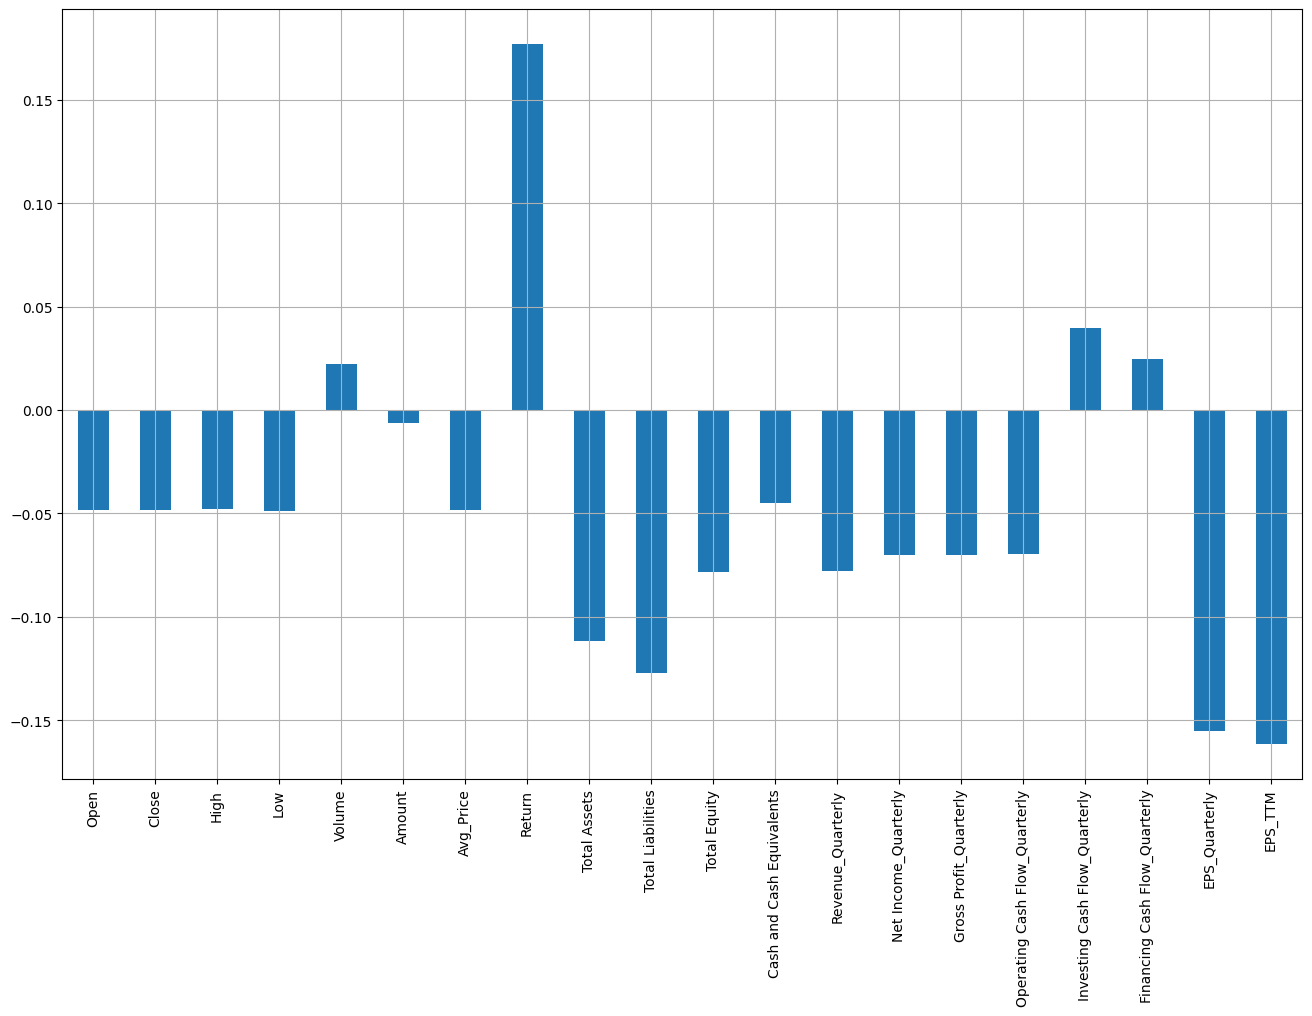

In [15]:
#Correlation of features with target
df_X.corrwith(df_y).plot.bar(figsize=(16, 10), grid=True)

**Interpreataion of the visulaisation obtained**:

The correlation analysis shows the strength of the linear relationship between the features and the target variable, volatility. Notably, Return has the highest positive correlation, indicating it may be a key driver of stock volatility. Several financial features, such as Net Income, Total Assets, and EPS, exhibit negative correlations, suggesting they are inversely related to volatility. Features like Volume and Amount have weaker correlations, indicating a minimal direct linear relationship with volatility in this context.

In [16]:
data1 = df.drop(columns=['Date','Stock'])

**Heatmap:**
This code performs a correlation analysis to identify features that are highly correlated with the target variable 'Volatility'. First, we remove irrelevant columns like 'Date' and 'Stock' from the dataset. Next, we calculate the correlation matrix and select features with an absolute correlation greater than 0.05 with 'Volatility'. Finally, we use a heatmap to visualize the correlations among these selected features, helping to identify which features have the strongest relationships with both 'Volati


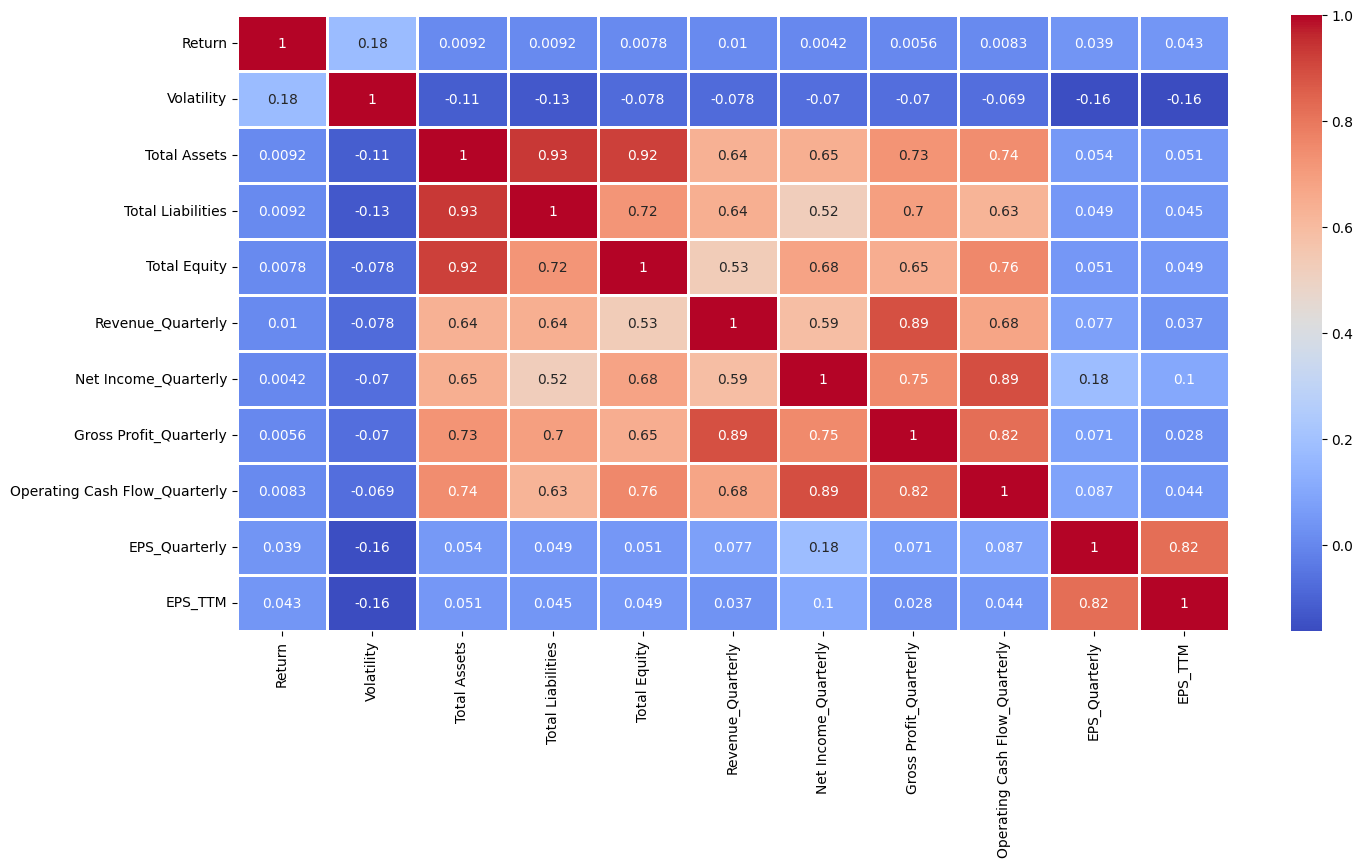

In [17]:
#Lets view only features that are highly correlated with the target variable
high_corr = data1.corr()
#Set of threshold of 0.05 to identify any high correlated features
high_corr_features = high_corr.index[abs(high_corr['Volatility']) > 0.05]
plt.figure(figsize=(16,8))
ax = sns.heatmap(data=data1[high_corr_features].corr(), annot=True, cmap='coolwarm', linewidths=2)

**Interpretation of the heatmap:**

The heatmap visualizes the correlation matrix for features that have a correlation with Volatility of at least 0.05.

**Key insights:**

- Return has a small positive correlation with Volatility (~0.18).

- Features like Net Income, Total Assets, and EPS show a small to moderate negative correlation with Volatility.

- High intercorrelations are seen between financial features like Revenue, Net Income, and Gross Profit (values close to 1), indicating these are closely related to each other but less directly related to volatility.

- Investing Cash Flow and Financing Cash Flow show moderate negative correlations with many financial features but have a weak relationship with Volatility.

This correlation analysis helps focus on the most influential features for volatility prediction and reveals the relationships between key financial indicators.

In [18]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
# Adjust to the last day of each month
df['Month_End_Date'] = df['Date'] + pd.offsets.MonthEnd(0)
#Create Quater and Fiscal Year Features
df['Is_Quarter_End'] = df['Month_End_Date'].dt.is_quarter_end.astype(int)
df['Is_Fiscal_Year_End'] = df['Month_End_Date'].dt.is_year_end.astype(int)


The code above processes the 'Date' column by first converting it into a datetime format. Then, it extracts new features such as the year, month, and quarter from the date. Additionally, it creates two new binary features, 'Is_Quarter_End' and 'Is_Fiscal_Year_End', to indicate whether the date falls at the end of a quarter or fiscal year, which may impact stock volatility.

Purpose: Temporal features help capture time-based patterns in volatility, such as quarter-end effects and fiscal year-end impacts, which can be crucial in predicting stock market behavior.

**NUMERICAL FEATURE ANALYSIS**

After pre processing we now want to apply some EDA in order to generate new features and identify trends in our data.

**Histogram and Boxplot:**

Below, we identify the numerical features in the dataset and perform exploratory data analysis (EDA). We generate histograms for each numerical feature to observe their distributions, which helps identify skewness or outliers. We also generate box plots to detect outliers in these features, providing insights into the range and variability of the data.


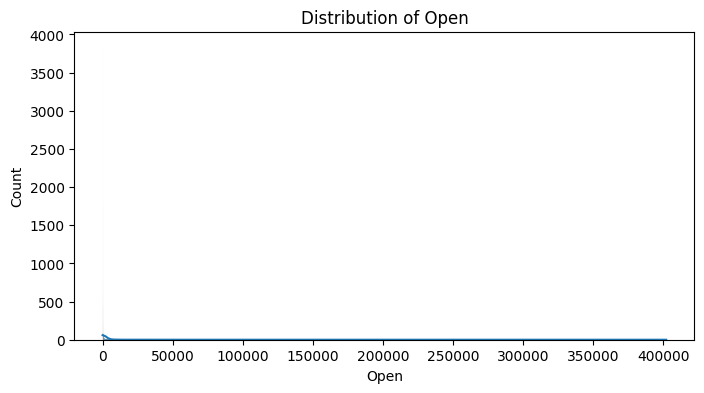

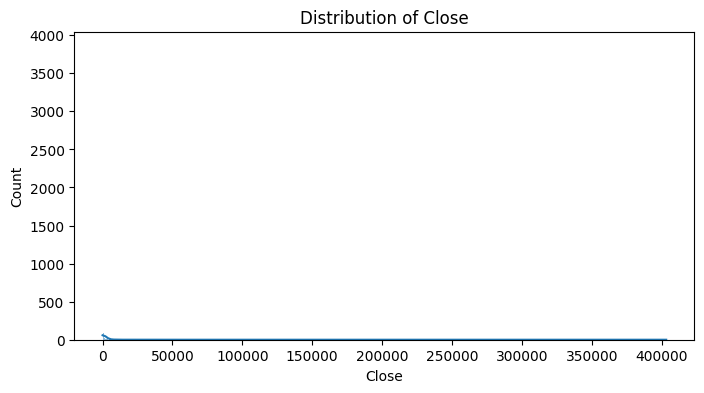

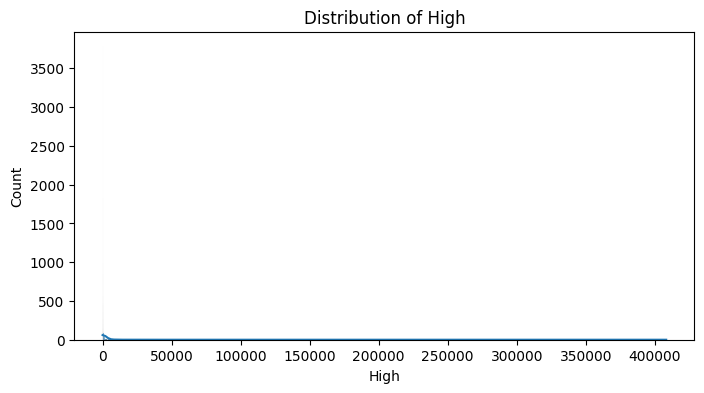

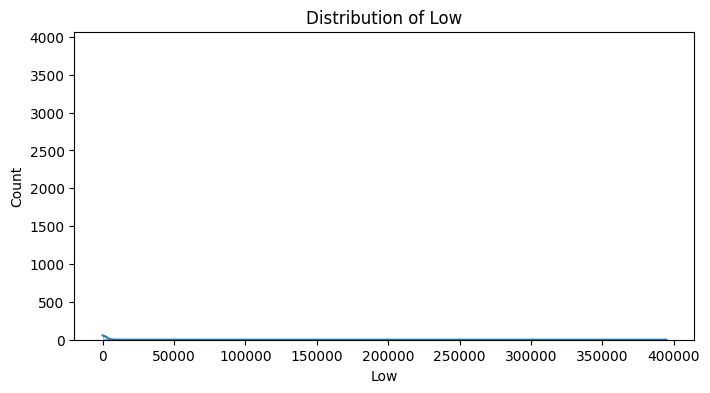

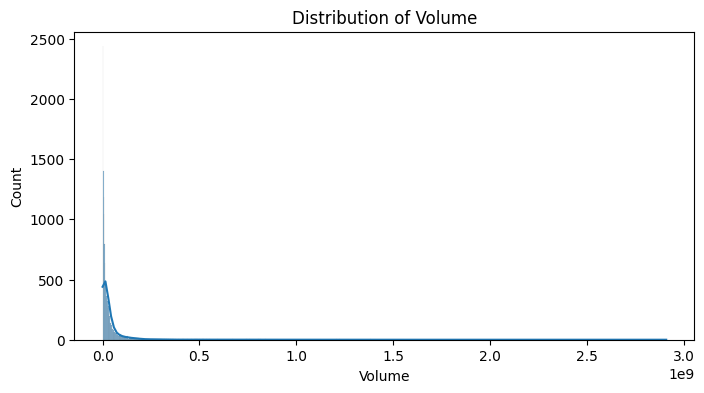

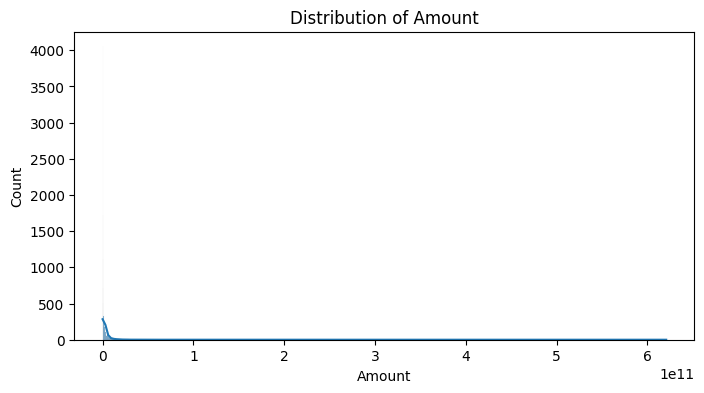

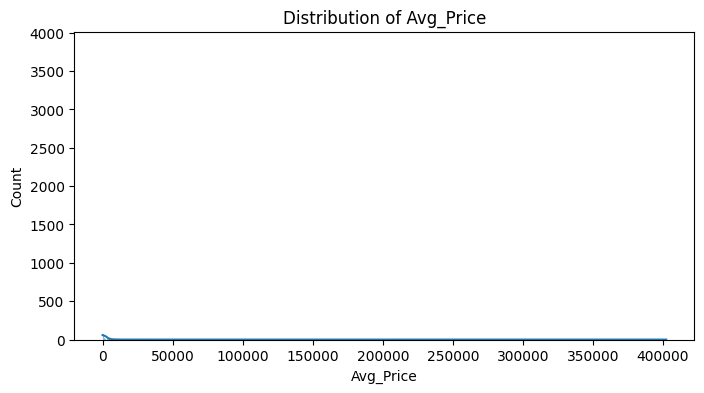

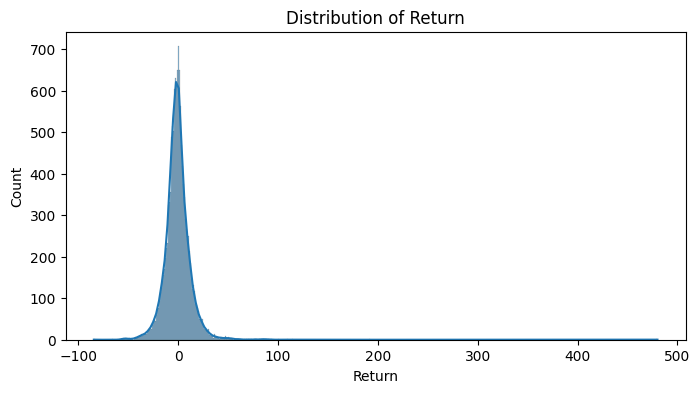

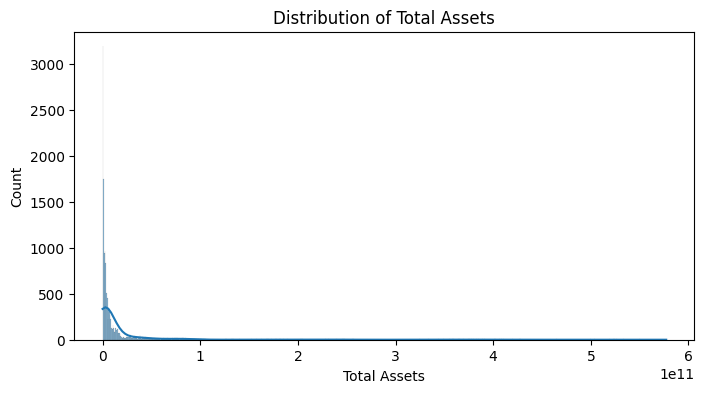

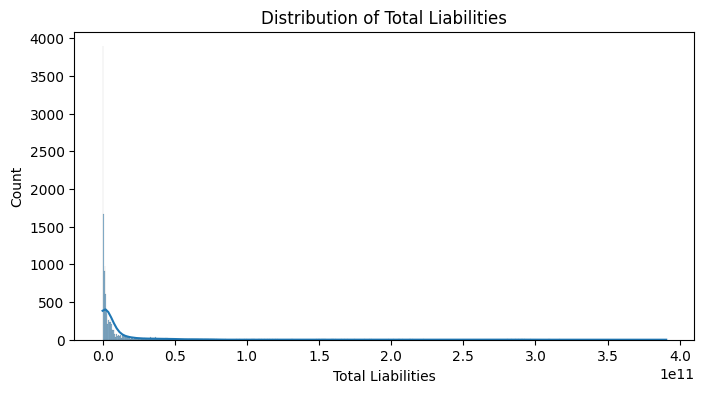

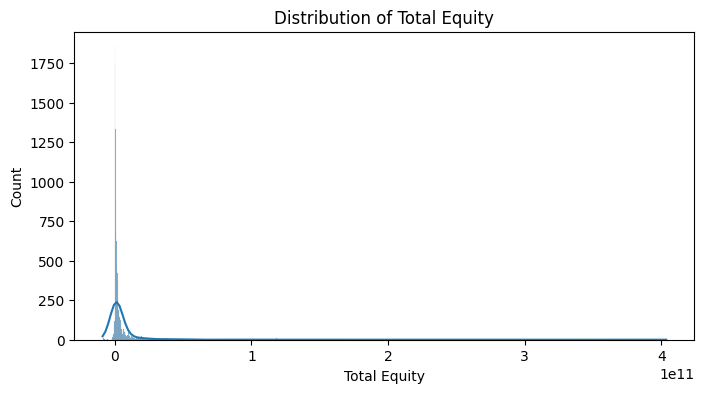

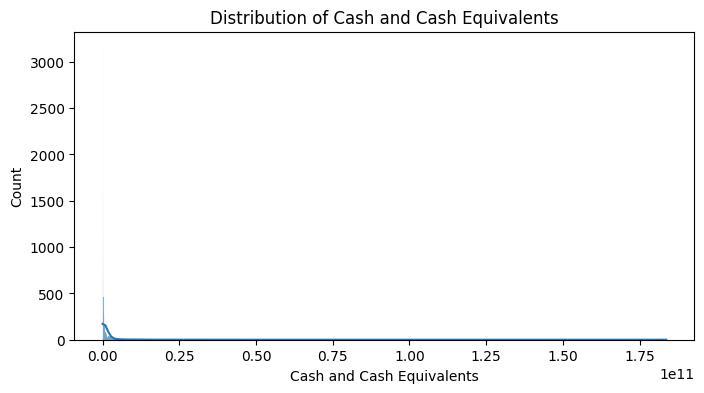

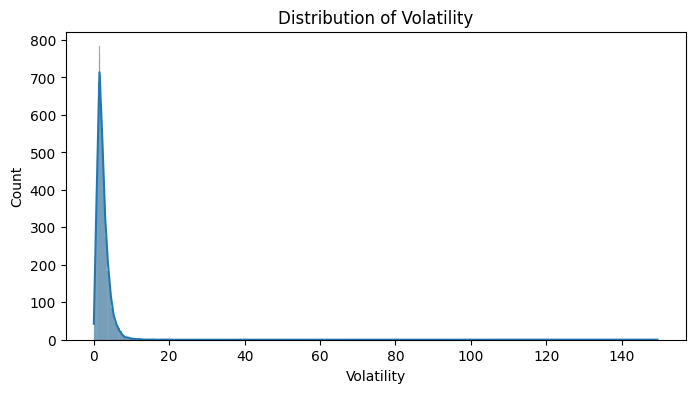

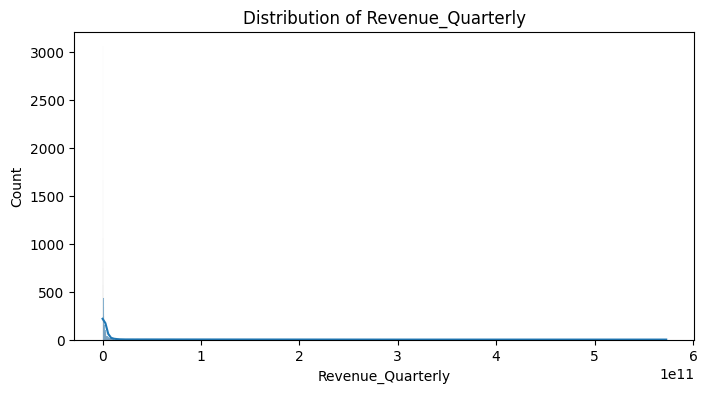

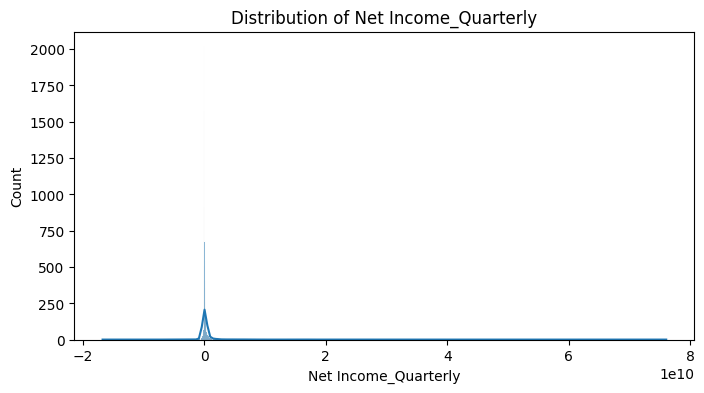

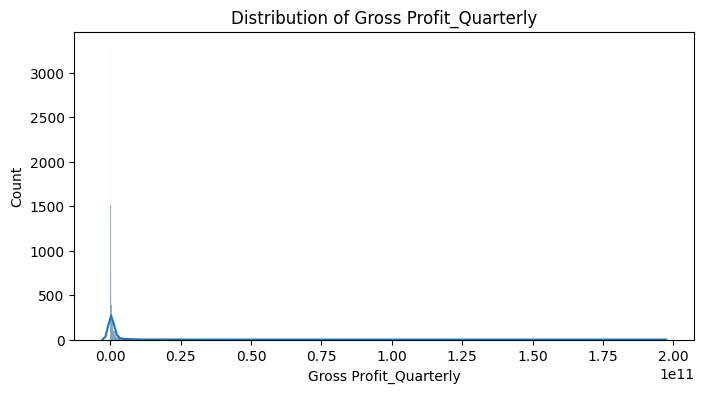

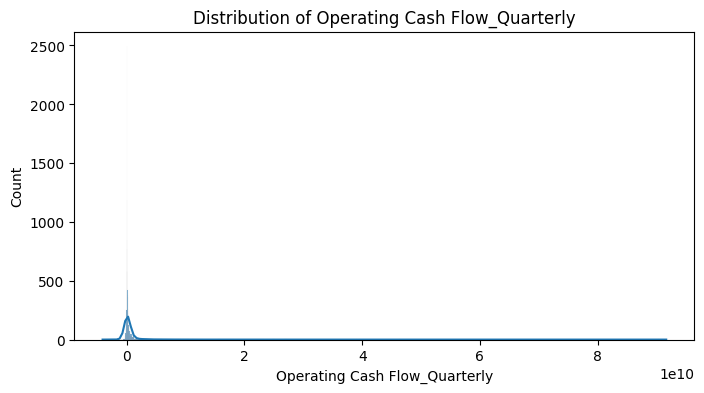

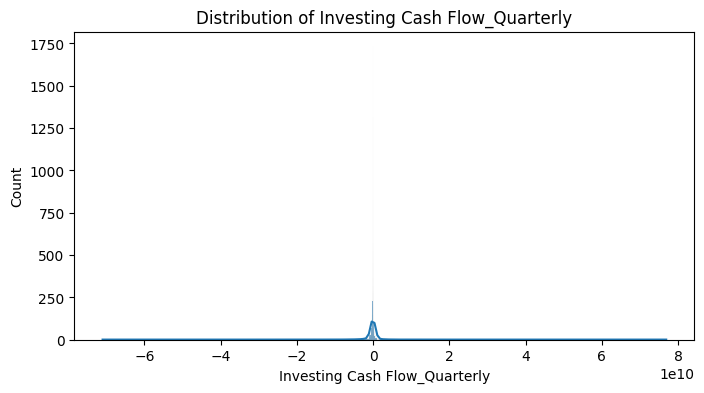

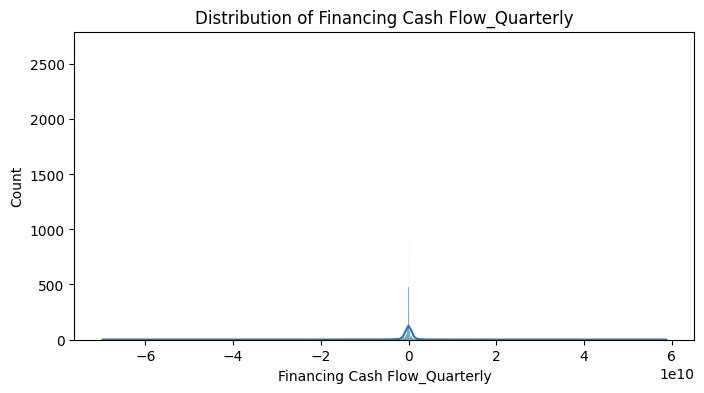

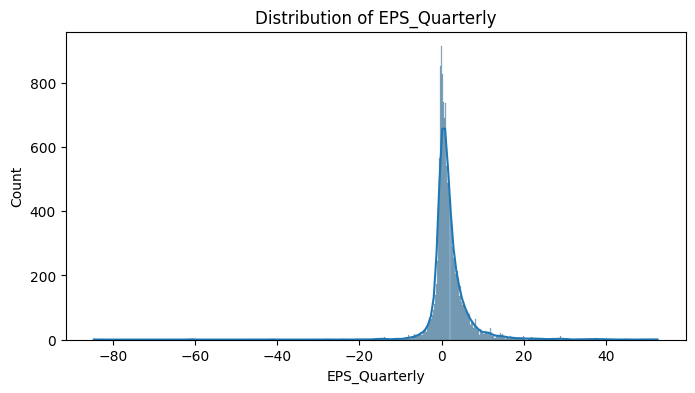

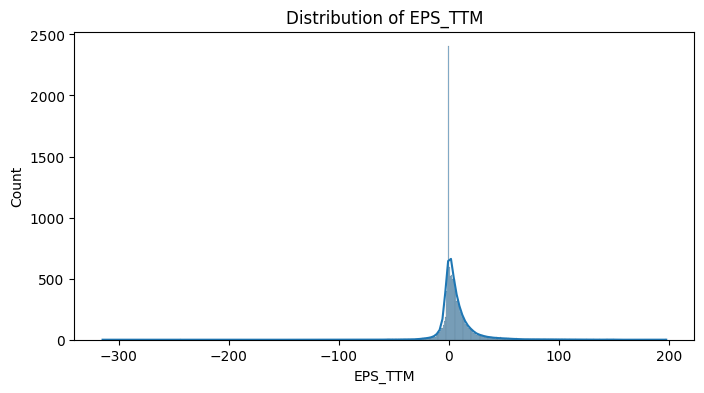

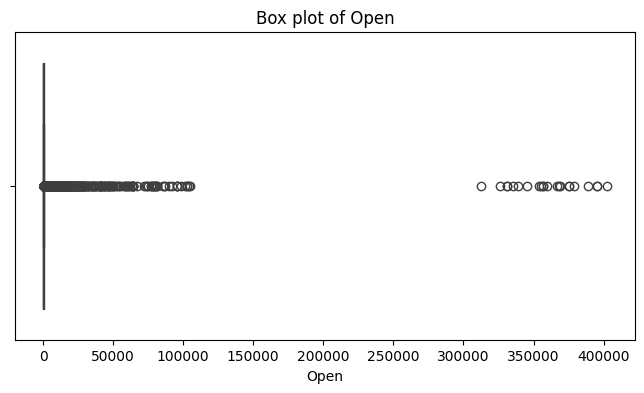

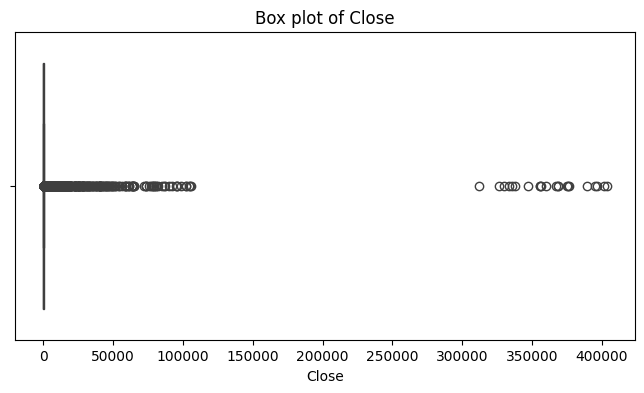

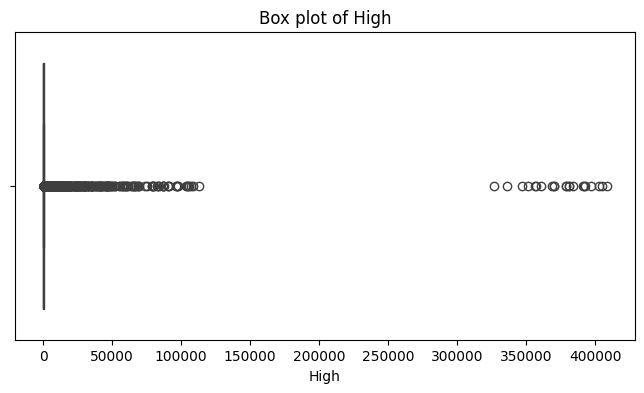

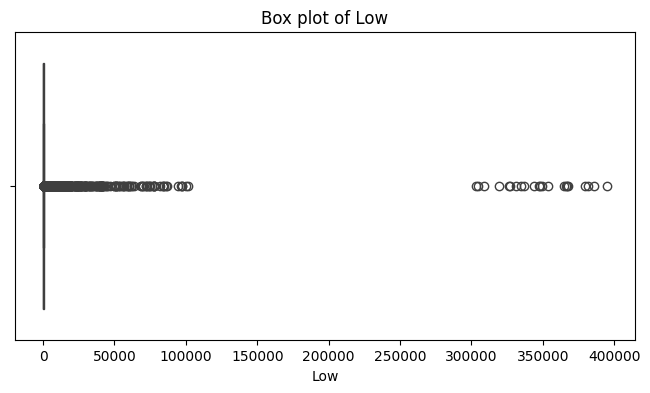

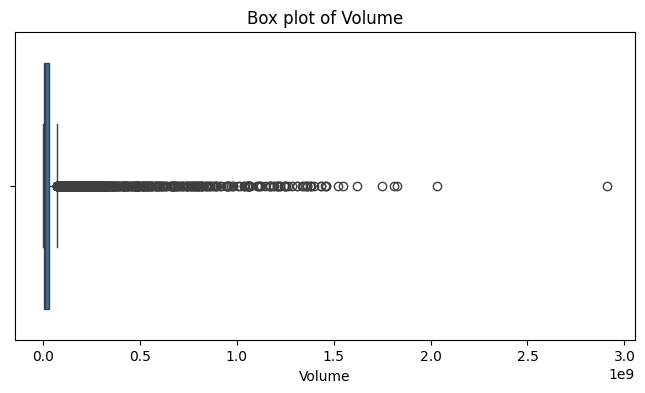

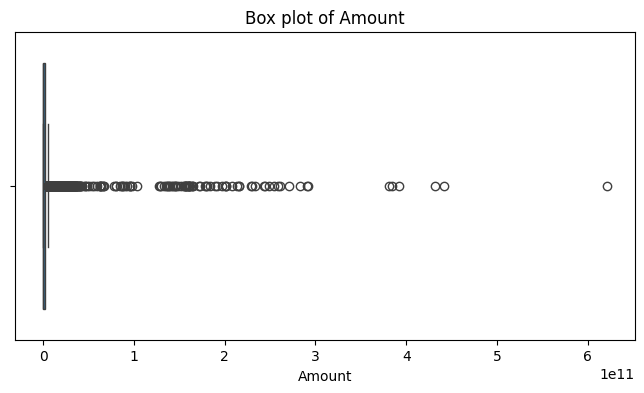

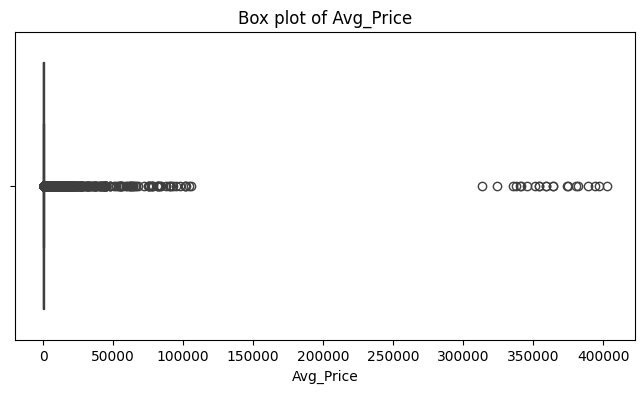

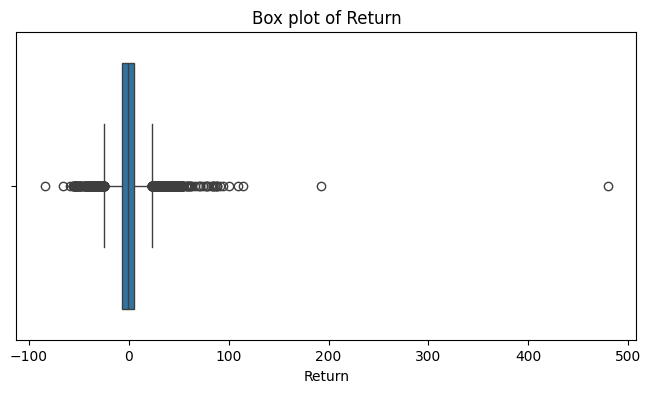

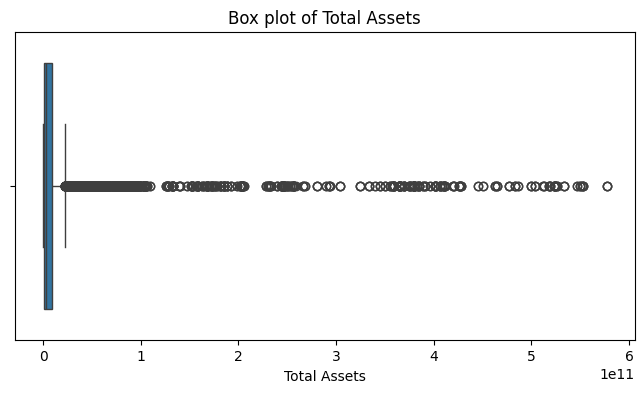

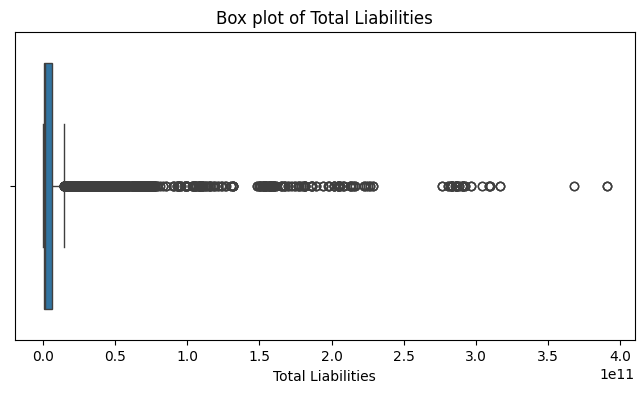

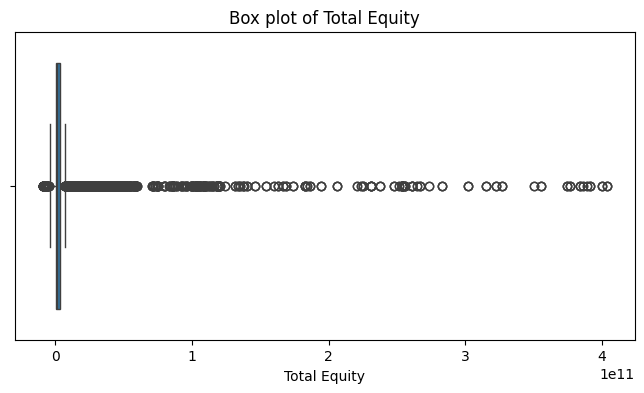

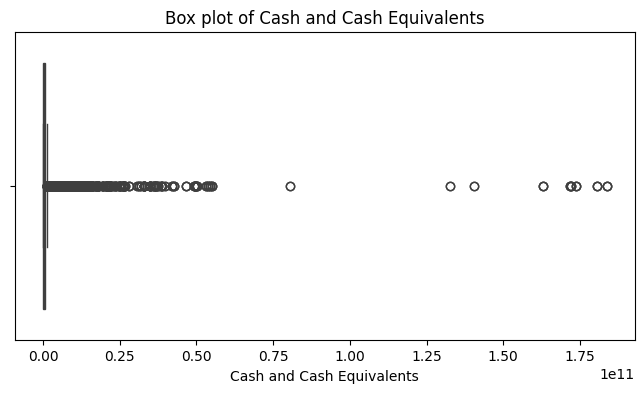

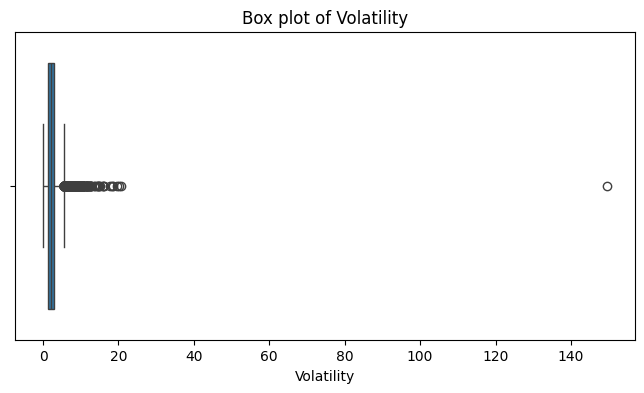

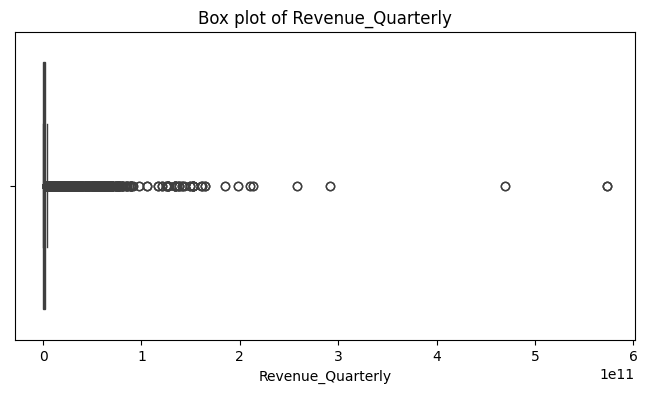

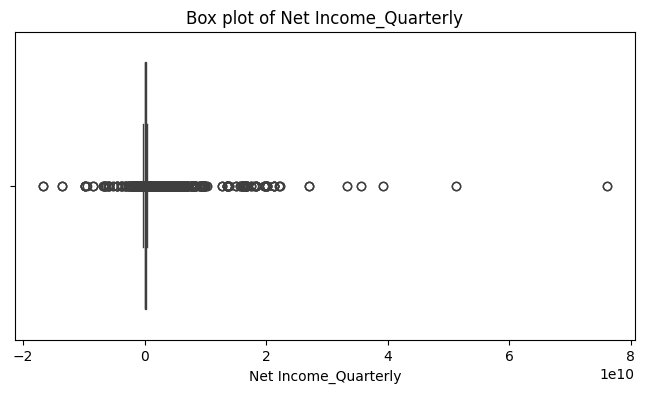

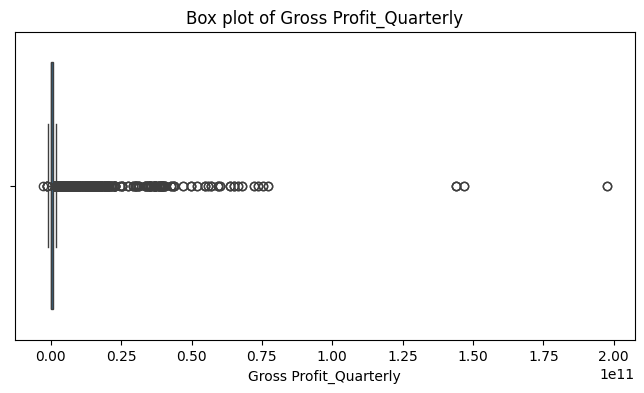

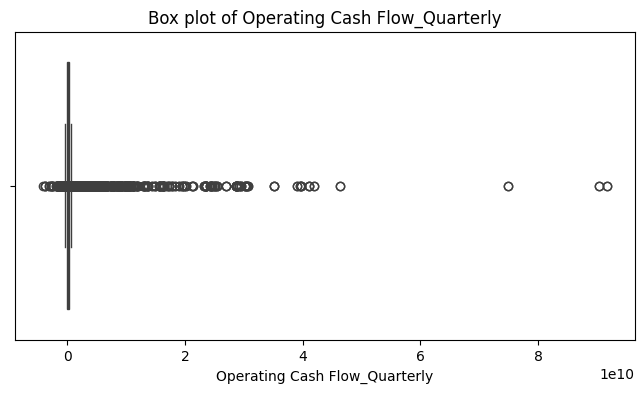

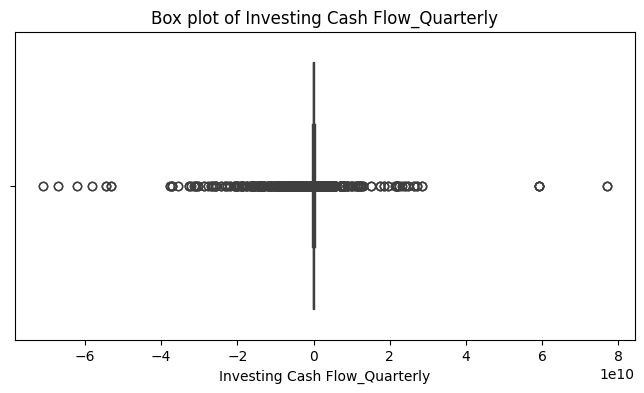

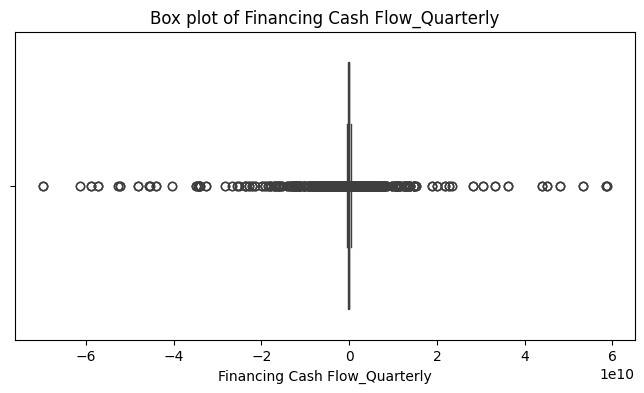

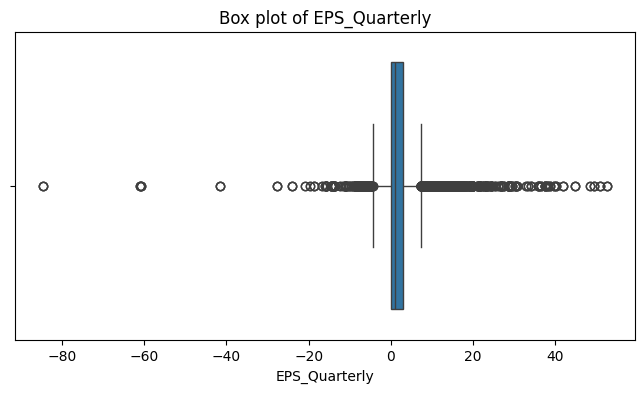

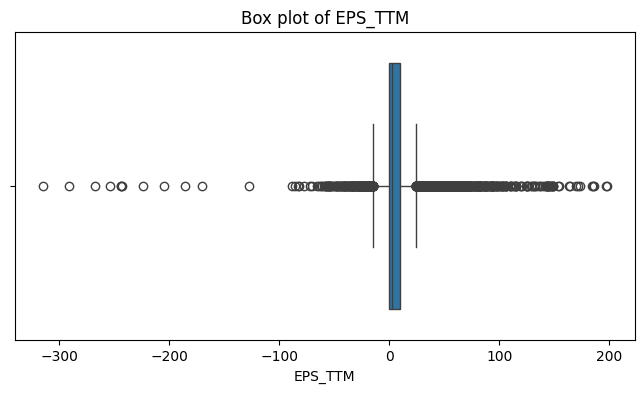

In [19]:
#Identify the numerical features
numerical_features = ['Open', 'Close', 'High', 'Low', 'Volume', 'Amount', 'Avg_Price', 'Return', 'Total Assets',
                      'Total Liabilities', 'Total Equity', 'Cash and Cash Equivalents','Volatility',
                     'Revenue_Quarterly','Net Income_Quarterly','Gross Profit_Quarterly','Operating Cash Flow_Quarterly',
                      'Investing Cash Flow_Quarterly','Financing Cash Flow_Quarterly','EPS_Quarterly','EPS_TTM']

# Plot histograms
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot box plots to detect outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

**Interpretation:**

- **Histograms**: The histograms show the distribution of each numerical feature. Some features, like 'Volume' and 'Amount', exhibit skewed distributions, indicating the presence of extreme values or outliers. 'Revenue_Quarterly' and 'Net Income_Quarterly' appear to be right-skewed, meaning most values are small with a few large outliers.
- **Boxplots**: The box plots confirm the presence of outliers in several features, as indicated by points outside the whiskers.'Total Assets' and 'Total Liabilities' show several outliers, which could impact model performance and may require further handling during preprocessing.


**Scatter plots:**

The below code generates scatter plots to examine the relationship between each numerical feature and the target variable, 'Volatility'. We iterate over the numerical features and create a scatter plot for each one to visually identify any trends, correlations, or potential patterns between the feature and 'Volatility'.


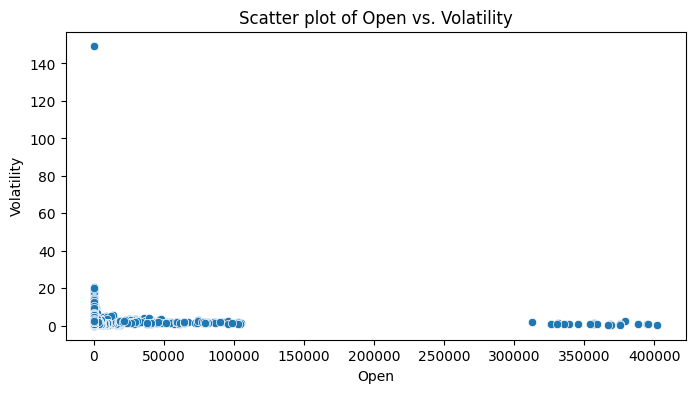

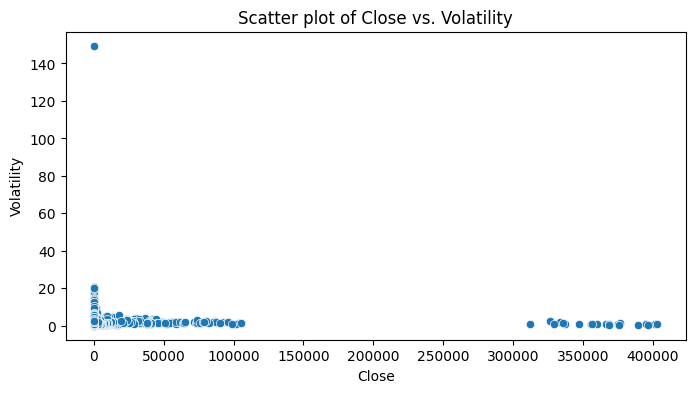

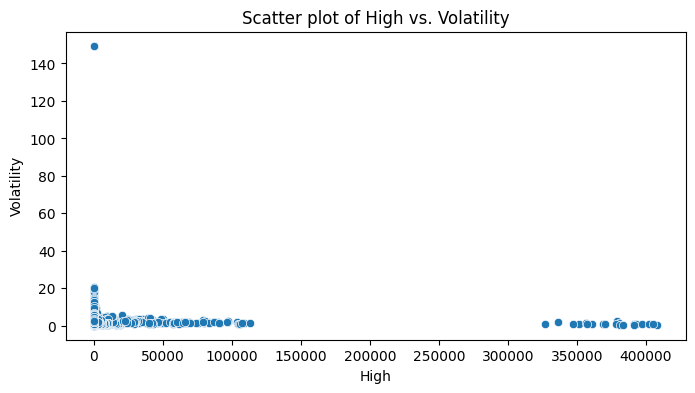

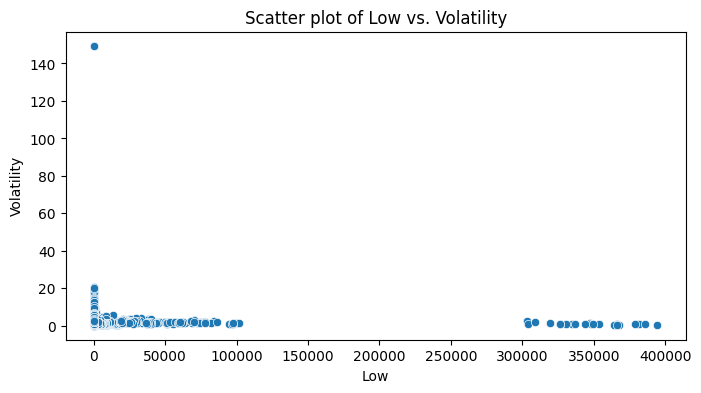

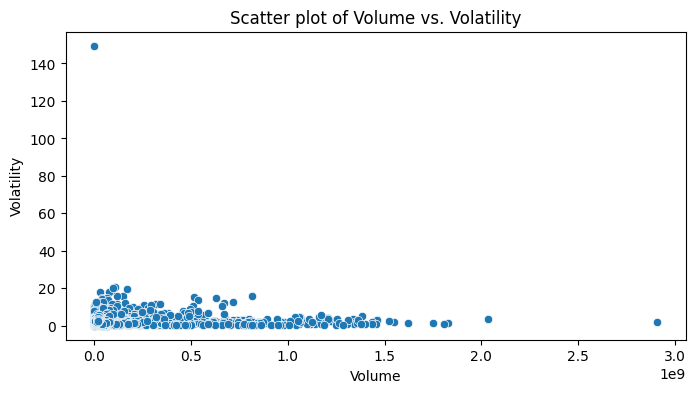

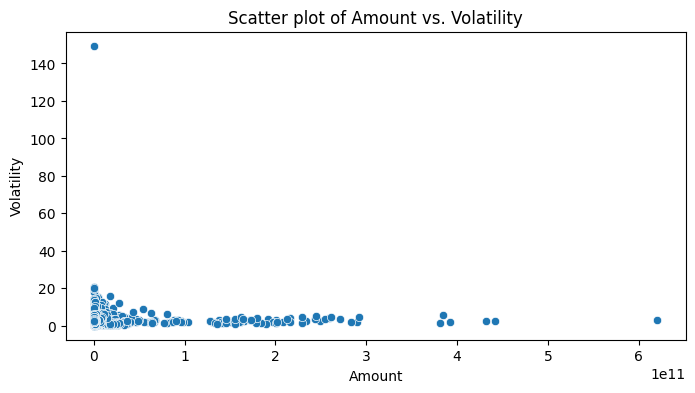

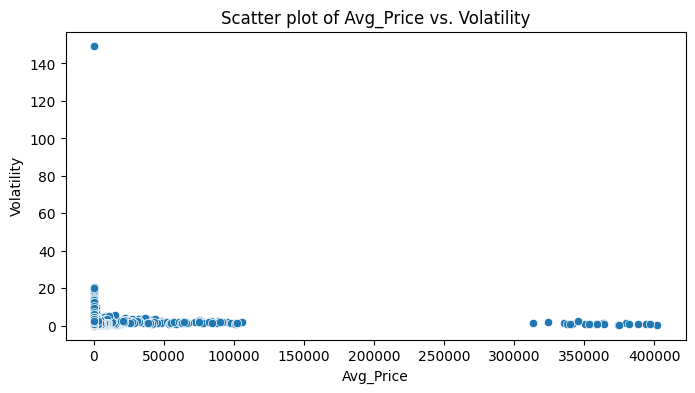

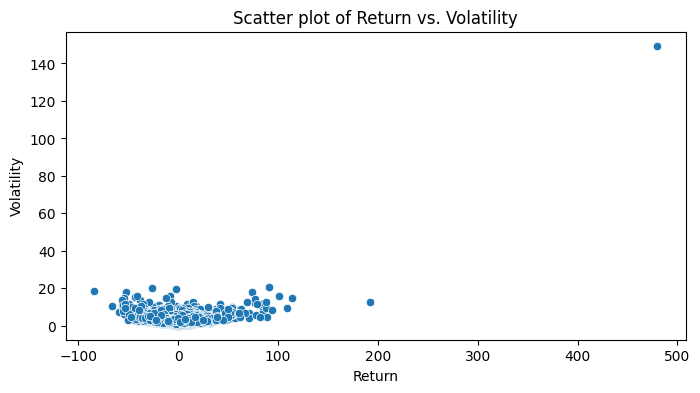

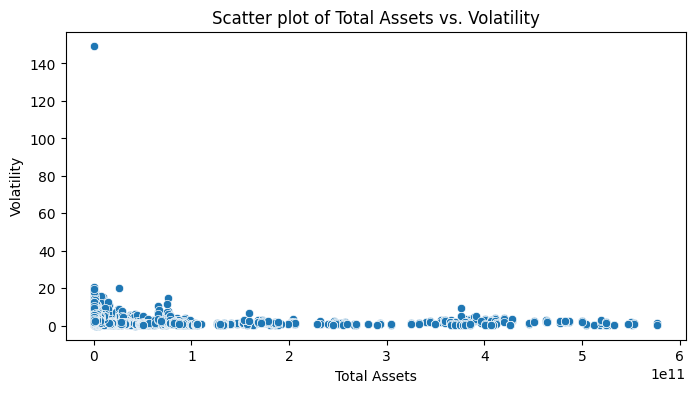

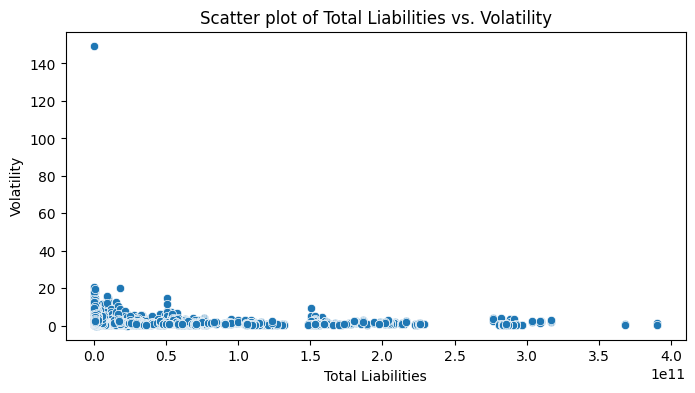

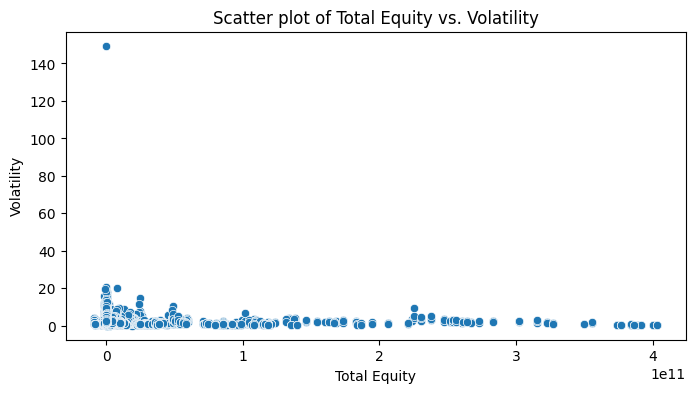

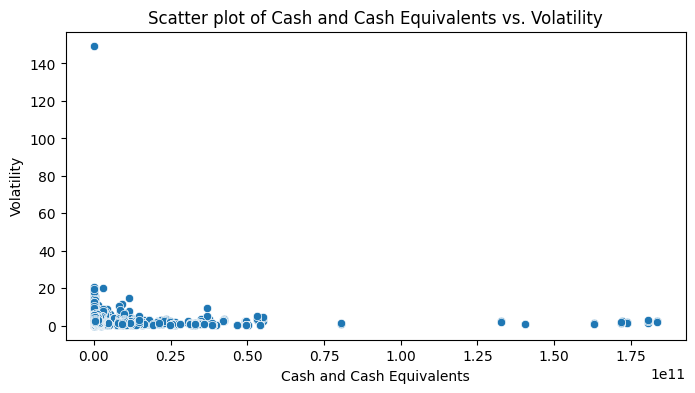

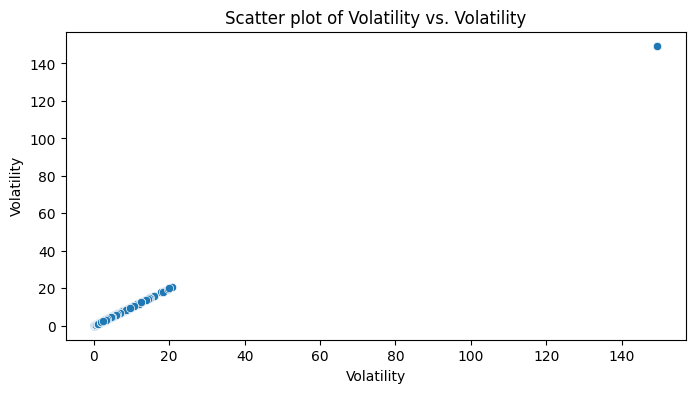

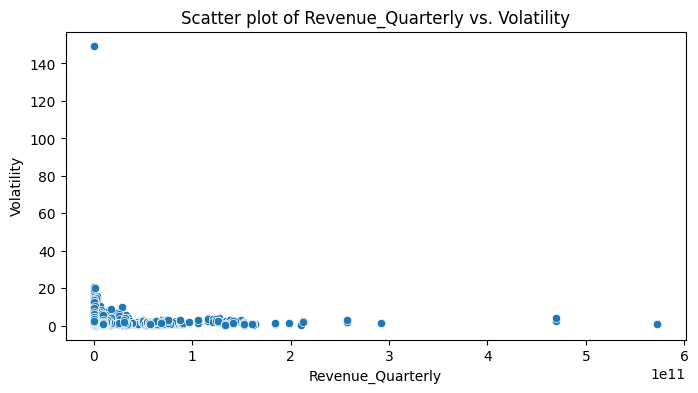

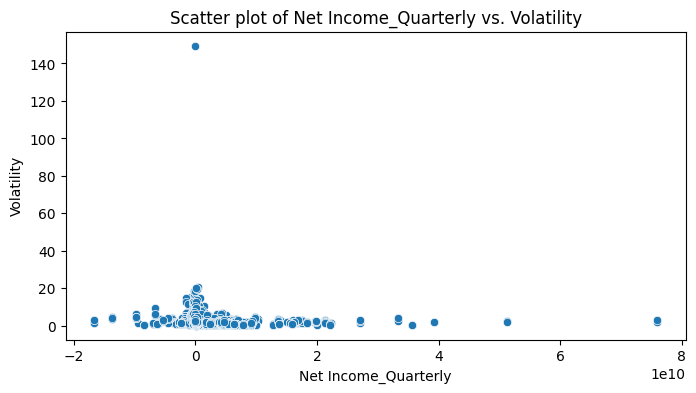

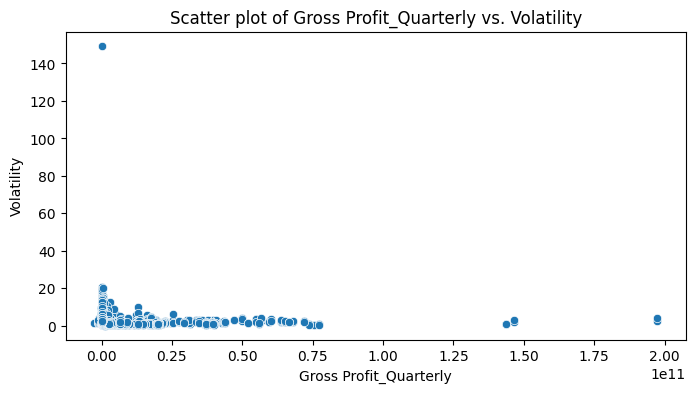

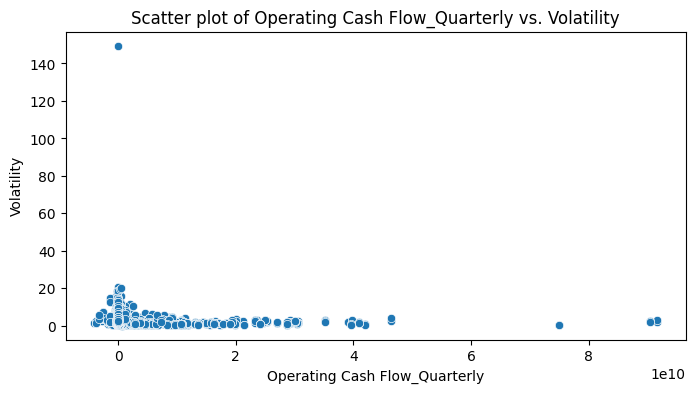

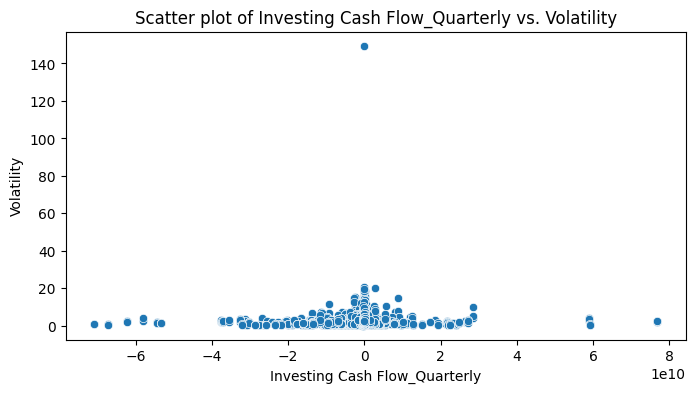

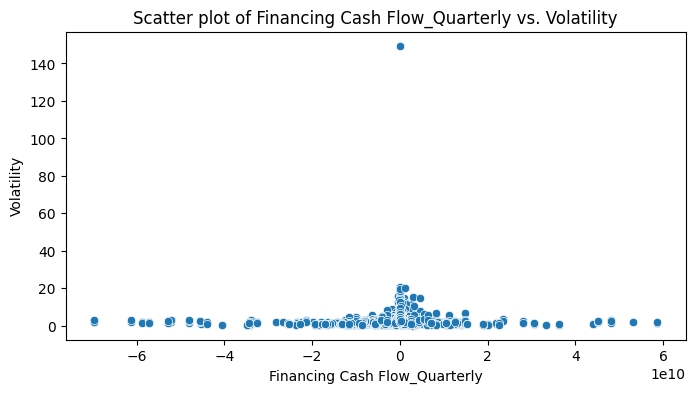

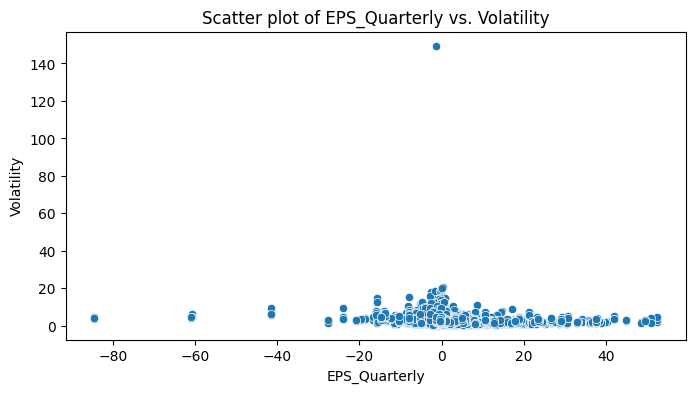

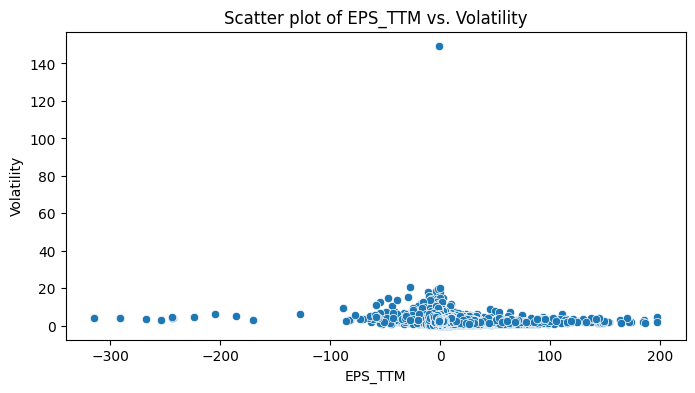

In [20]:
target = 'Volatility'
# Scatter plots with Volatility
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'Scatter plot of {feature} vs. {target}')
    plt.show()

**Interpretation:**

- **Open vs. Volatility**: The scatter plot shows a concentration of data points near lower volatility values, with no strong linear or clear trend. Most data points cluster around lower 'Volatility', indicating little correlation between 'Open' prices and 'Volatility'.
  
- **Close vs. Volatility**: Similar to the 'Open' plot, the data points are densely packed near low volatility values, with a few outliers. There is no apparent linear relationship between 'Close' prices and stock volatility.

- **High/Low vs. Volatility**: Both 'High' and 'Low' prices follow a similar pattern to 'Open' and 'Close'. The data points remain clustered around lower 'Volatility', suggesting that the daily price range is not strongly predictive of volatility in this dataset.

- **Volume vs. Volatility**: The scatter plot reveals a spread of points, indicating that as trading volume increases, volatility remains low for most observations. However, some outliers show higher volatility at extreme volume levels, possibly suggesting that unusually high trading volumes could be linked to increased volatility in a few instances.

- **Return vs. Volatility**: This scatter plot exhibits a clearer relationship. As 'Return' values increase or decrease, we observe a more scattered distribution of volatility values, suggesting a potential nonlinear relationship between stock returns and volatility.

- **Total Assets/Total Liabilities vs. Volatility**: Both plots show minimal correlation, with data points clustering at lower volatility levels, indicating that these financial indicators are not strongly related to short-term volatility.



**Line plot:**

This code generates time series line plots for several features, such as 'Open', 'Close', 'High', 'Low', 'Avg_Price', and 'Volatility', against the 'Date'. The purpose is to visualize how these numerical features change over time, helping us identify trends, seasonal patterns, and fluctuations in the data.


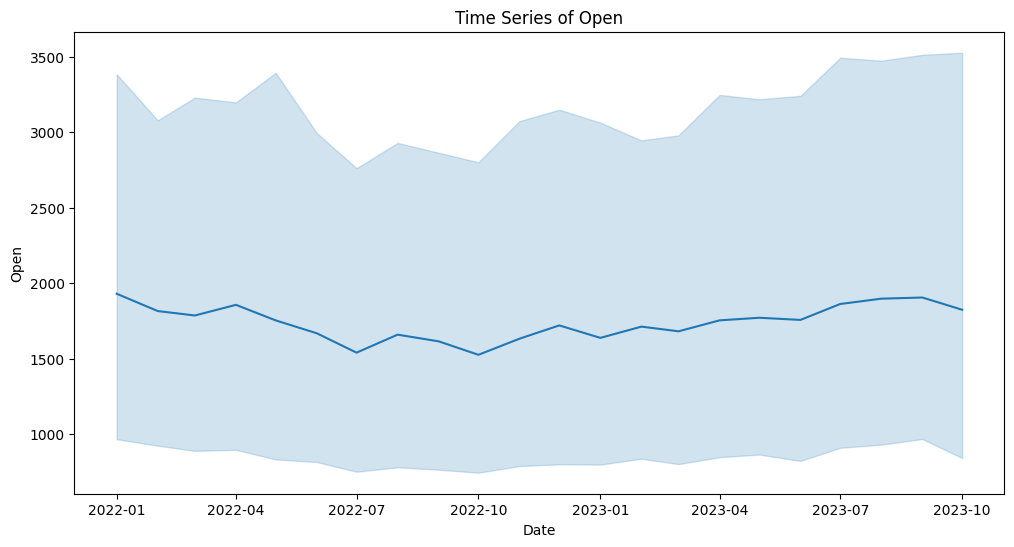

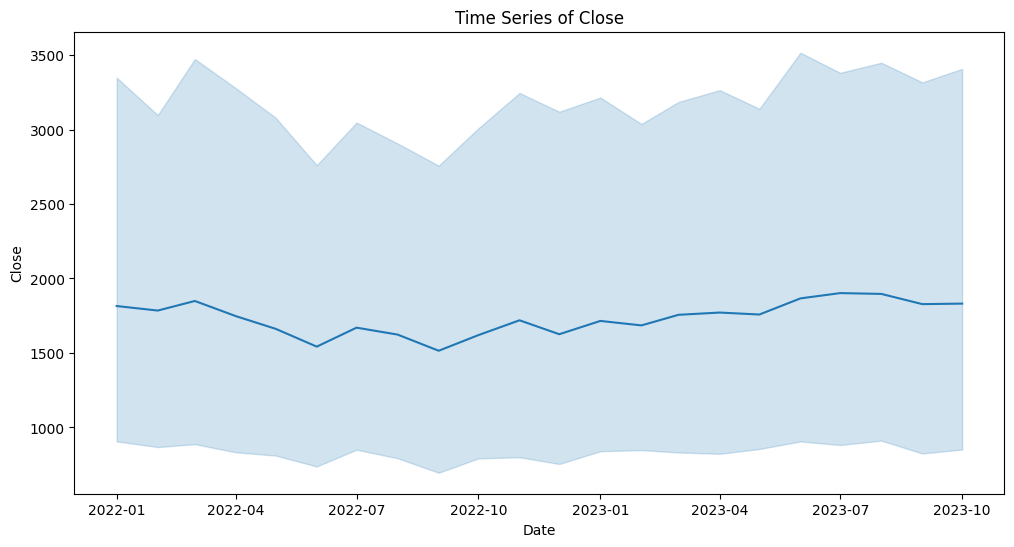

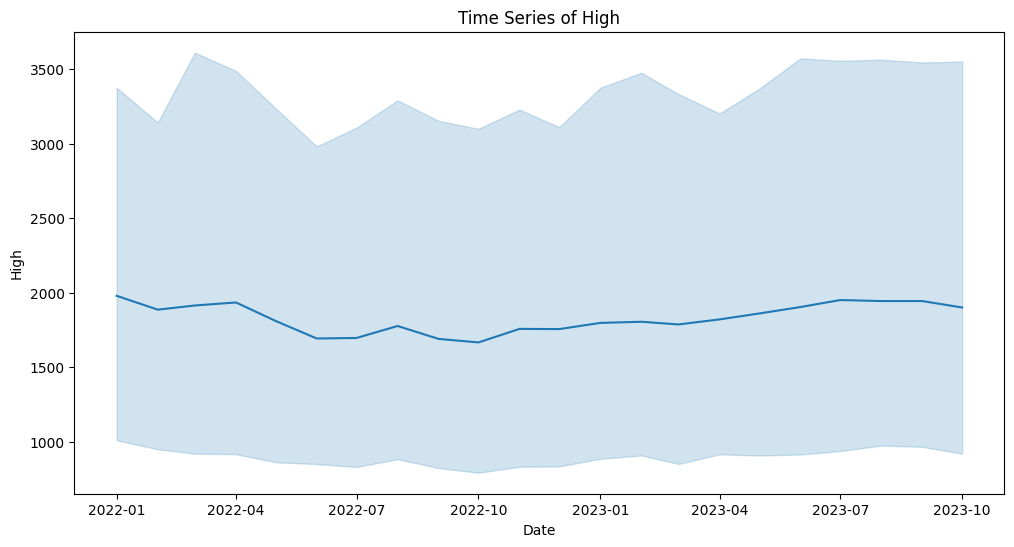

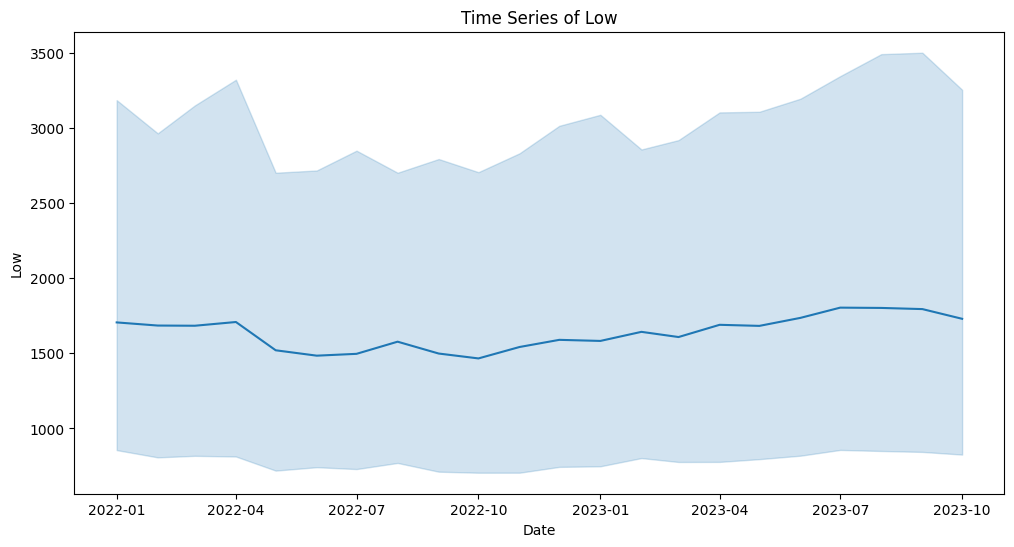

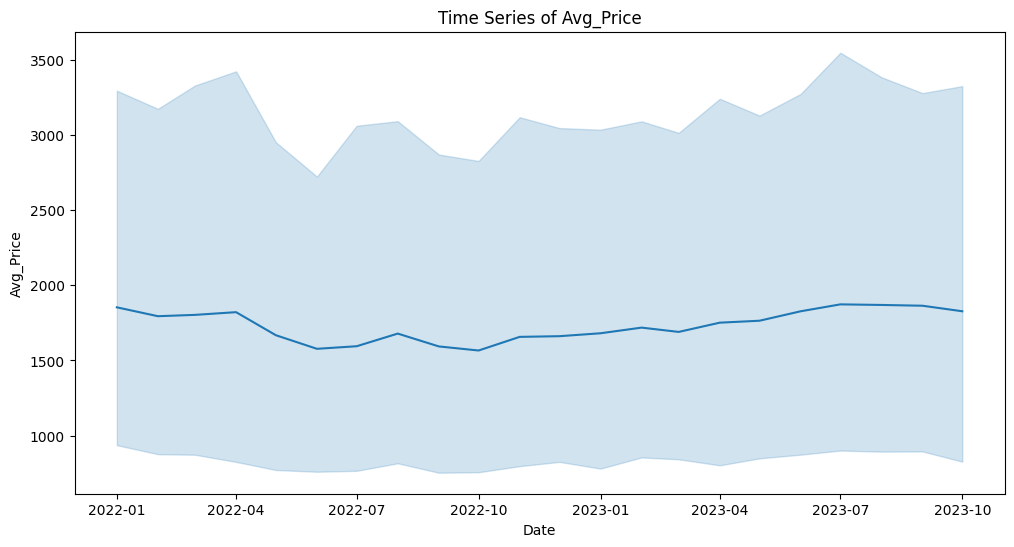

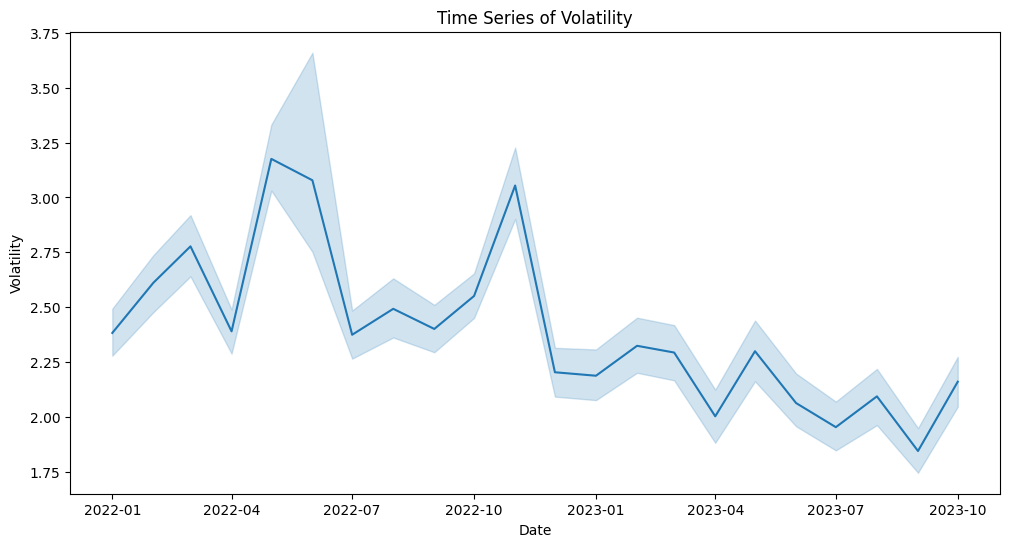

In [21]:
# Line plot for time series data
time_series_features = ['Open', 'Close', 'High', 'Low', 'Avg_Price', 'Volatility']

for feature in time_series_features:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y=feature, data=df)
    plt.title(f'Time Series of {feature}')
    plt.show()

**Interpretation of the above line plots:**

- **Price Features (Open, Close, High, Low, Avg_Price)**: The time series plots show fluctuations over time with occasional peaks and troughs, but overall there is a gradual downward trend followed by some recovery later in the period. This suggests that the stock prices experienced periods of volatility but eventually stabilized.
  
- **Volatility**: The time series of 'Volatility' shows a much more erratic pattern with significant peaks and valleys. This indicates periods of high market uncertainty and instability, followed by calmer phases.


**Monthly Volatility Distribution:**


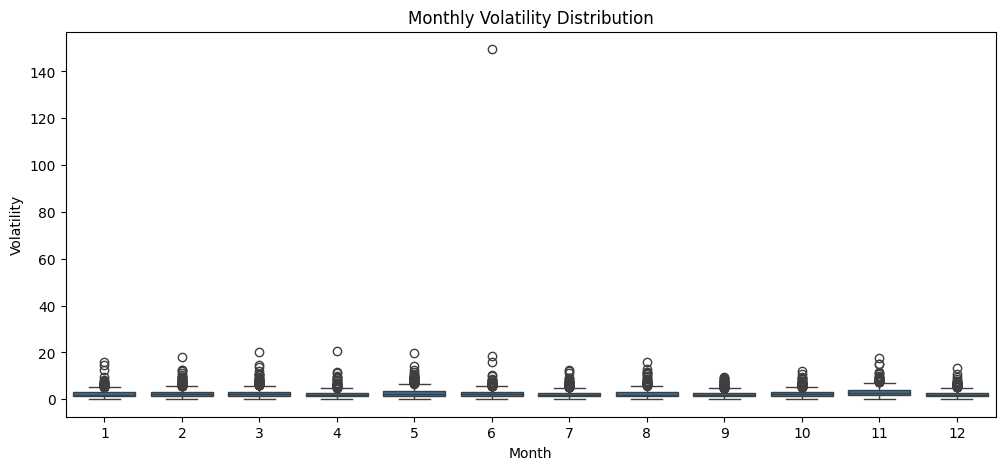

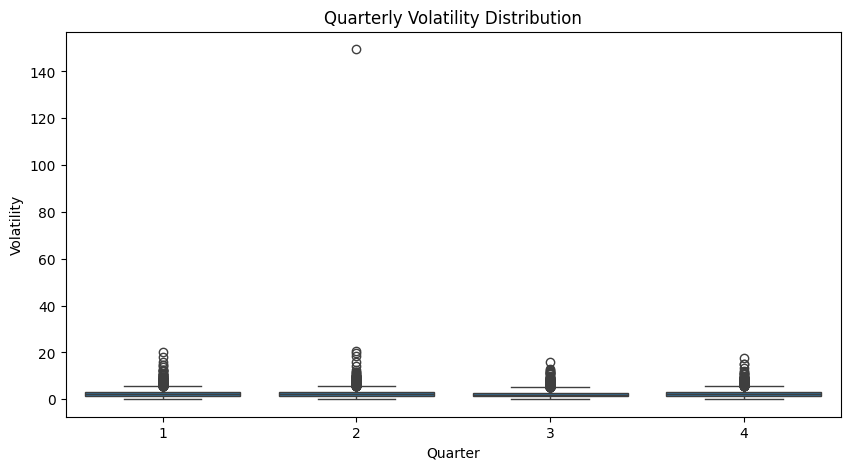

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Month', y='Volatility', data=df)
plt.title('Monthly Volatility Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Quarter', y='Volatility', data=df)
plt.title('Quarterly Volatility Distribution')
plt.show()

**Interpretation of the boxplot:**

The boxplots visualize the distribution of volatility across months and quarters. The Monthly Volatility Distribution plot shows that volatility remains fairly consistent throughout the year, with slight increases during certain months like May and June. There are a few outliers in these months, indicating occasional spikes in volatility. The Quarterly Volatility Distribution shows a similar pattern, with volatility being relatively stable across quarters, although there is a notable outlier in the second quarter. Overall, these visualizations help identify periods of higher or lower volatility, although no strong seasonal patterns are evident

**Top 10 volatile stocks:**

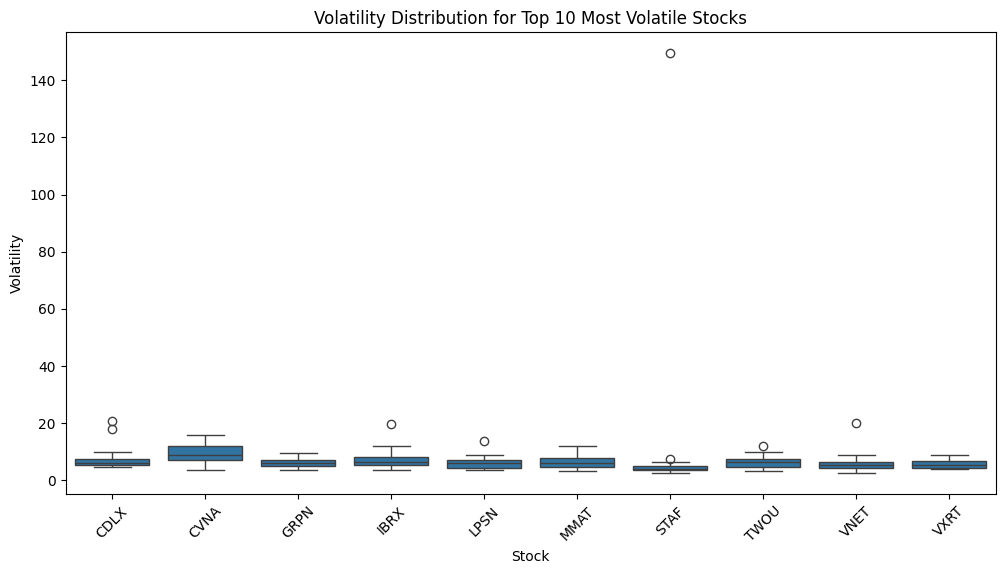

In [23]:
top_10_volatile_stocks = df.groupby('Stock')['Volatility'].mean().nlargest(10)

plt.figure(figsize=(12,6))
sns.boxplot(x='Stock', y='Volatility', data=df[df['Stock'].isin(top_10_volatile_stocks.index)])
plt.xticks(rotation=45)
plt.title('Volatility Distribution for Top 10 Most Volatile Stocks')
plt.show()

**Interpretation of above boxplot:**

The boxplot shows the volatility distribution for the top 10 most volatile stocks. Each box represents the spread of volatility for individual stocks. The majority of the stocks have low median volatility, clustered between 0 and 20. Some stocks, like CDLX and MMAT, exhibit wider interquartile ranges, indicating more variability in their volatility, while others such as IBRX, STAF, and VNET show less variation. There are several outliers, such as for CDLX, which exhibits extremely high volatility (over 140), indicating a few days of significant price fluctuations compared to the others. This plot helps in identifying which stocks are more prone to extreme volatility spikes.



**Feature Engineering:**

Based on the EDA we have generated new features to leverage the individual importance of each feature.



In [24]:

#Difference between a stock’s highest and lowest price
df['Price_Range'] = df['High'] - df['Low']
#Difference between closing and opening prices
df['Daily_Spread'] = df['Close'] - df['Open']

# Create cyclical features for month
df['Month_sin'] = np.sin(2 * np.pi * df['Month']/12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month']/12)


#Ratio measures a company's share price relative to its earnings per share (EPS).
df['Price_to_Earnings'] = df['Close'] / df['EPS_Quarterly']
#Ratio of the Income to the Revenue
df['Profit_Margin'] = df['Net Income_Quarterly'] / df['Revenue_Quarterly']
#Ratio of Income to the Assests
df['ROA'] = df['Net Income_Quarterly'] / df['Total Assets']

#To study the risk involved within a company
df['Debt_to_Equity_Ratio'] = df['Total Liabilities'] / df['Total Equity']
#Ratio of the Cash Flow to the total liabilities of a company
df['Cash_Flow_to_Liabilities'] = df['Operating Cash Flow_Quarterly'] / df['Total Liabilities']
#Net earnings on a quaterly basis
df['Earnings_Volatility'] = df['Net Income_Quarterly'].rolling(window=3).std()
#Profit tracking
df['Profitability_Consistency'] = (df['Gross Profit_Quarterly'] - df['Gross Profit_Quarterly'].shift(1)).abs()


# Replace infinities and NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

Based on EDA insights, new features were derived to address gaps in the original dataset and enhance predictive power. Price_Range captures intra-day volatility by measuring fluctuations between High and Low prices, while Daily_Spread reflects market reactions within a day (Close vs. Open). Cyclical features like Month_sin and Month_cos account for seasonal patterns observed in the data, while financial ratios such as Price_to_Earnings, Profit_Margin, and ROA provide a more granular view of a company's financial health and its correlation with volatility. Risk indicators like the Debt-to-Equity Ratio and Earnings Volatility measure financial risk and stability, with Profitability Consistency tracking changes in quarterly gross profit. These derived features build on EDA insights and capture complex relationships between stock behavior, financial health, and market volatility.














**Check for Skewness:**


In [25]:
def check_skewness(dataset):
     skewness_values = {}

     for column in dataset.columns:
         if pd.api.types.is_numeric_dtype(dataset[column]):
             skewness = skew(dataset[column].dropna())  # Drop NA values to avoid errors
             skewness_values[column] = skewness
             print(f'Skewness of {column}: {skewness:.2f}')
         else:
             print(f'Skipping non-numeric column: {column}')

     return skewness_values

skewness_dict = check_skewness(df)
print(skewness_dict)

Skipping non-numeric column: Date
Skewness of Open: 20.65
Skewness of Close: 20.77
Skewness of High: 20.52
Skewness of Low: 20.96
Skewness of Volume: 8.21
Skewness of Amount: 16.40
Skewness of Avg_Price: 20.73
Skewness of Return: 4.48
Skewness of Volatility: 29.19
Skewness of Total Assets: 6.03
Skewness of Total Liabilities: 5.88
Skewness of Total Equity: 8.39
Skewness of Cash and Cash Equivalents: 16.16
Skipping non-numeric column: Stock
Skewness of Revenue_Quarterly: 14.89
Skewness of Net Income_Quarterly: 12.99
Skewness of Gross Profit_Quarterly: 13.52
Skewness of Operating Cash Flow_Quarterly: 13.10
Skewness of Investing Cash Flow_Quarterly: -2.01
Skewness of Financing Cash Flow_Quarterly: -2.90
Skewness of EPS_Quarterly: 0.68
Skewness of EPS_TTM: 0.43
Skewness of Year: 0.18
Skewness of Month: 0.08
Skewness of Quarter: 0.13
Skipping non-numeric column: Month_End_Date
Skewness of Is_Quarter_End: 0.78
Skewness of Is_Fiscal_Year_End: 4.36
Skewness of Price_Range: 23.06
Skewness of Dai

**DATA TRANSFORMATION:**


**Log Transformation and Scaling :**

 Log transformation is applied to highly skewed columns (like Open, Close, Amount), and the features are scaled using Min-Max scaling to ensure they lie in a common range.

 Log transformation helps in normalizing skewed distributions, which improves model performance by reducing the dominance of outliers. Scaling is important because many machine learning models (e.g., gradient boosting) are sensitive to feature ranges, and a common range ensures that no feature disproportionately influences the model.

In [26]:
#This function perfroms log transformation and scaler to the columns
def log_transform_and_scale(dataset, columns):
   #Define the scaling required
    scaler = MinMaxScaler()
    dataset_transformed = dataset
    #SElect each column
    for column in columns:
        # Log transformation (adding 1 to avoid log(0))
        dataset_transformed[column] = np.log1p(dataset_transformed[column])
        # Scaling
        dataset_transformed[column] = scaler.fit_transform(dataset_transformed[[column]])

    return dataset_transformed


In [27]:
#This function performs only scaling on the columns
def scale_columns(dataset, columns):
    scaler = MinMaxScaler()
    dataset_scaled = dataset

    for column in columns:
        # Scaling
        dataset_scaled[column] = scaler.fit_transform(dataset_scaled[[column]])

    return dataset_scaled

In [28]:
columns_to_log_transform_and_scale = ['Open', 'Close','High','Low','Amount','Avg_Price','Cash and Cash Equivalents']
columns_to_scale = ['Volume', 'Return','Total Assets','Total Liabilities','Total Equity','Investing Cash Flow_Quarterly','Financing Cash Flow_Quarterly','EPS_Quarterly','EPS_TTM',
                   'Price_Range','Daily_Spread','Earnings_Volatility','Profitability_Consistency','Revenue_Quarterly',
                                     'Net Income_Quarterly','Gross Profit_Quarterly','Operating Cash Flow_Quarterly','Debt_to_Equity_Ratio','Cash_Flow_to_Liabilities',
                    'Price_to_Earnings',	'Profit_Margin',	'ROA',	'Debt_to_Equity_Ratio',	'Cash_Flow_to_Liabilities']

# Apply log transformation and scaling
dataset_transformed = log_transform_and_scale(df, columns_to_log_transform_and_scale)

# Apply only scaling
dataset_scaled = scale_columns(df, columns_to_scale)

Text(0.5, 1.0, 'Log-Transformed Distribution')

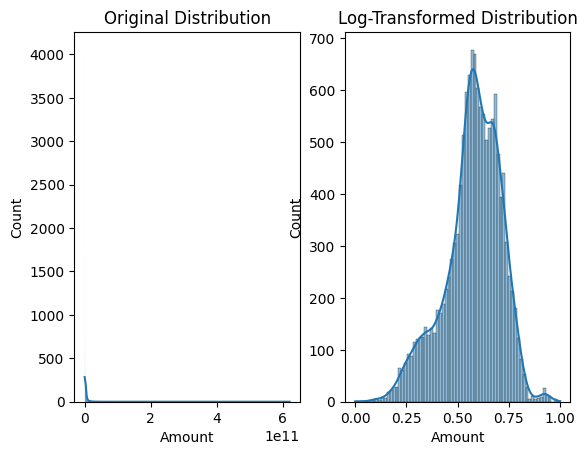

In [29]:
#Check log transformation applied
plt.subplot(1, 2, 1)
sns.histplot(dataset['Amount'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], kde=True)
plt.title('Log-Transformed Distribution')

**One-Hot Encoding:**

The Stock column, which is categorical, is converted into multiple binary columns (one-hot encoded) to represent each stock.One-hot encoding is used to convert categorical variables into a format that can be used by machine learning algorithms. This transformation is necessary because most machine learning algorithms require numerical inputs.

In [30]:
#Perform one hot encoding to convert categorical variables to binary columns
data_set = df.copy()
encoder = OneHotEncoder(sparse=False)
stock_encoded = encoder.fit_transform(data_set[['Stock']])
encoded_df = pd.DataFrame(stock_encoded, columns=encoder.get_feature_names_out(['Stock']))
data_set = pd.concat([data_set.drop(columns=['Stock']), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
# Replace infinities and NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)
data_set.replace([np.inf, -np.inf], np.nan, inplace=True)
data_set.fillna(0, inplace=True)

**FEATURE SELECTION:**

In [32]:
#Set the alpha value
best_alpha = 0.0001
#Drop the target variable and any date type variable
X = data_set.drop(columns=['Volatility','Date','Month_End_Date'])
y = data_set['Volatility']
# Fit the Lasso model with the best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X, y)

selected_features = np.array(X.columns)[lasso_model.coef_ != 0]
print("Selected features by Lasso:", selected_features)

Selected features by Lasso: ['Open' 'Close' 'High' 'Low' 'Volume' 'Amount' 'Avg_Price' 'Return'
 'Total Liabilities' 'Total Equity' 'Cash and Cash Equivalents'
 'Operating Cash Flow_Quarterly' 'EPS_Quarterly' 'Year' 'Month' 'Quarter'
 'Is_Quarter_End' 'Is_Fiscal_Year_End' 'Price_Range' 'Daily_Spread'
 'Month_sin' 'Month_cos' 'Profit_Margin' 'ROA' 'Debt_to_Equity_Ratio'
 'Cash_Flow_to_Liabilities' 'Earnings_Volatility'
 'Profitability_Consistency' 'Stock_A' 'Stock_AAL' 'Stock_ABG' 'Stock_ABT'
 'Stock_ACA' 'Stock_ACCO' 'Stock_ACIW' 'Stock_ACNT' 'Stock_ACU'
 'Stock_ADP' 'Stock_ADSK' 'Stock_AEE' 'Stock_AEP' 'Stock_AES' 'Stock_AGX'
 'Stock_AINC' 'Stock_AIR' 'Stock_AIRT' 'Stock_ALGT' 'Stock_ALIM'
 'Stock_ALK' 'Stock_ALKS' 'Stock_ALSN' 'Stock_AMAT' 'Stock_AMCX'
 'Stock_AMN' 'Stock_AMSC' 'Stock_AMZN' 'Stock_ANET' 'Stock_ANF'
 'Stock_ANSS' 'Stock_AOS' 'Stock_APD' 'Stock_APEI' 'Stock_AQB'
 'Stock_ARLP' 'Stock_ARTNA' 'Stock_ARVN' 'Stock_ASGN' 'Stock_ASH'
 'Stock_ASUR' 'Stock_ASYS' 'Stock_ATNI' 'S

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.237e+03, tolerance: 5.579e+00
  model = cd_fast.enet_coordinate_descent(


We need to generate predictions for the 23rd Month hence we extract the data from the test csv file.

In [33]:
#Load the csv
test_df = pd.read_csv('A1_stock_volatility_submission.csv')

# Set Date columns ato datetime format
df['Date'] = pd.to_datetime(dataset['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Add the 23rd month column
df = pd.concat([df, test_df], ignore_index=True)

# Sort the data by 'Stock' and 'Date' to maintain chronological order
df = df.sort_values(by=['Stock', 'Date']).reset_index(drop=True)

df['Date'] = pd.to_datetime(df['Date'])

# Extract the date features for the 23rd column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
# Adjust to the last day of each month
df['Month_End_Date'] = df['Date'] + pd.offsets.MonthEnd(0)

# Create the 'Is_Quarter_End' and 'Is_Fiscal_Year_End' features
df['Is_Quarter_End'] = df['Month_End_Date'].dt.is_quarter_end.astype(int)
df['Is_Fiscal_Year_End'] = df['Month_End_Date'].dt.is_year_end.astype(int)
df['Month_sin'] = np.sin(2 * np.pi * df['Month']/12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month']/12)





**Creation of Lagged Features:**

Once we have our finalised features , we generate lagged features based on the selected features from the feature selection process.

Lagged features are created for financial metrics like Total Assets, Cash Flow, and stock prices. Lagged features capture the values of these variables in previous time periods (1 or 3 months prior).

Lagged features are crucial for time series data, as they allow the model to learn temporal dependencies. By understanding how past values influence current volatility, the model can make better predictions about future volatility

In [34]:
#This function creates lagged features of 1 and 3 for the selected features and returns the new columns for each stock group
def create_lagged_features(group, field_name, lags=[1, 3]):
    # Create the lagged features
    for lag in lags:
        group[f'{field_name}_Lag_{lag}'] = group[field_name].shift(lag)

    # Fill NA values with zero within each group
    group.fillna(0, inplace=True)

    return group

In [35]:
#Define the features
lagged_fields = ['Total Assets', 'Total Liabilities','Total Equity', 'Cash and Cash Equivalents','Debt_to_Equity_Ratio','Cash_Flow_to_Liabilities','Earnings_Volatility','Profitability_Consistency','ROA',
                 'Revenue_Quarterly','Net Income_Quarterly','Gross Profit_Quarterly','Operating Cash Flow_Quarterly','Investing Cash Flow_Quarterly','Financing Cash Flow_Quarterly','Profit_Margin']
for field in lagged_fields:
  #Only craete lagged for those that are selected features
    if field in selected_features:
        df = df.groupby('Stock', group_keys=False).apply(lambda group: create_lagged_features(group, field))


In [36]:
#This function creates lagged features of 1 and 3 for the EPS feature and returns the new columns for each stock group
def process_eps_data(group, eps_column):

    # Create Lag 1 and Lag 3 features for Quarterly EPS
    group[f'{eps_column}_Lag_1'] = group[eps_column].shift(1)
    group[f'{eps_column}_Lag_3'] = group[eps_column].shift(3)

    # Fill NA values with zero within each group
    group.fillna(0, inplace=True)

    return group

In [37]:
#Define the columns
eps_column = ['EPS_Quarterly','EPS_TTM']
for field in eps_column:
  #Only create a lagged feature if it is a selected feature
    if field in selected_features:
        df = df.groupby('Stock', group_keys=False).apply(lambda group: process_eps_data(group, field))



In [38]:
#This function creates lagged features of 1 and 3 for the financial  feature and returns the new columns for each stock group
def lagged(group, column):
    group[f'{column}_Lag_1'] = group[column].shift(1)
        # Fill NA values with zero for these features
    group.fillna(0, inplace=True)

    return group

In [39]:
#Define the columns
fields = ['Open', 'Close','High', 'Low','Volume','Amount','Avg_Price','Return','Volatility','Price_Range',
          'Daily_Spread','Price_to_Earnings']
for field in fields:
  #Only create a lagged feature if it is a selected feature
    if field in selected_features:
        df = df.groupby('Stock', group_keys=False).apply(lambda group: lagged(group, field))




Since we need to predict the 23rd month and we have original data only uptil the 22nd month we are going to use only the lagged features to train the model , since these lagged features can be generated for the 23rd month and used as features for prediction of volatility.

**MODEL TRAINING AND EVALUATION:**

In [40]:
#Define features for training
features = ['Date' ,'Year', 'Month' ,'Quarter','Is_Quarter_End','Is_Fiscal_Year_End','Total Liabilities_Lag_1',
       'Total Liabilities_Lag_3', 'Total Equity_Lag_1', 'Total Equity_Lag_3',
       'Cash and Cash Equivalents_Lag_1', 'Cash and Cash Equivalents_Lag_3',
       'Debt_to_Equity_Ratio_Lag_1', 'Debt_to_Equity_Ratio_Lag_3',
       'Cash_Flow_to_Liabilities_Lag_1', 'Cash_Flow_to_Liabilities_Lag_3',
       'Earnings_Volatility_Lag_1', 'Earnings_Volatility_Lag_3',
       'Profitability_Consistency_Lag_1', 'Profitability_Consistency_Lag_3',
       'Open_Lag_1', 'Close_Lag_1', 'High_Lag_1', 'Low_Lag_1', 'Volume_Lag_1',
       'Amount_Lag_1', 'Avg_Price_Lag_1', 'Return_Lag_1', 'Price_Range_Lag_1',
       'Daily_Spread_Lag_1',
       'Operating Cash Flow_Quarterly_Lag_1',
       'Operating Cash Flow_Quarterly_Lag_3',
            'Profit_Margin_Lag_1',
       'Profit_Margin_Lag_3','Month_sin',
 'Month_cos','Stock','Volatility']


In [41]:
#Create a data frame of only selected features
data = df[features]

In [42]:
#Perform one hot encoding on stock to transform categorical to binary columns
#Encoding the stock column
encoder = OneHotEncoder(sparse=False)
#Store encoded data
stock_encoded = encoder.fit_transform(data[['Stock']])
encoded_df = pd.DataFrame(stock_encoded, columns=encoder.get_feature_names_out(['Stock']))
#Added encoded columns into the data farem
data = pd.concat([data.drop(columns=['Stock']), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**MODEL TUNING**

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Cross-Validation RMSE: 1.5973 ± 0.7501
Validation RMSE: 0.9426967990500782


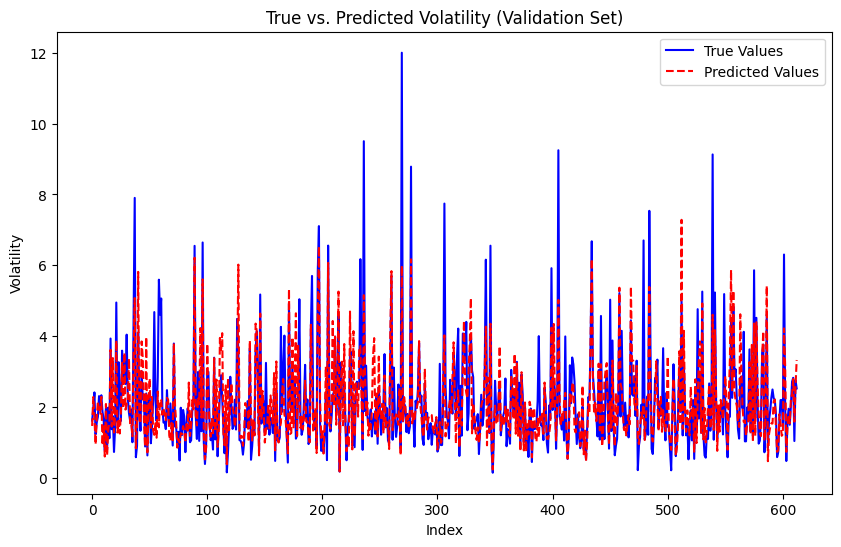

In [45]:
#Define the train and target variables
X = data.drop(columns=['Volatility'])
y = data['Volatility']

#Cutoff date for train data
cutoff_date = pd.to_datetime('2023-09-01')
#Cutoff date for validation data
cutoff_date_val = pd.to_datetime('2023-10-01')
#Cutoff date for test data
cutoff_date_test = pd.to_datetime('2023-11-01')


# Train set has data uptil the 21st month
X_train = X[X['Date'] <= cutoff_date]
y_train = y[X['Date'] <= cutoff_date]

# Validation set has data for the 22nd month
X_val = X[X['Date'] == cutoff_date_val]
y_val = y[X['Date'] == cutoff_date_val]

#Test data is the 23rd month
X_test = X[X['Date'] == cutoff_date_test]

#Drop date column
X_train = X_train.drop('Date', axis=1)
X_val = X_val.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)

# Define the hyperparameter grid
param_grid = {
    #Number of trees in the forest
    'n_estimators': [100, 200, 300],
    #Maximum depth of each tree
    'max_depth': [None, 10, 20, 30],
    #Minimum number of samples required to split a node
    'min_samples_split': [2, 5, 10],
    #Minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 2, 4],
    #Bootstrap samples
    'bootstrap': [True, False]
}

# Define the model
rf = RandomForestRegressor(random_state=42)

#Randomized search to select the hyperparameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=5,
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Use the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Perform cross-validation on the selected model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}')

# Predict on the validation set
y_pred = best_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Validation RMSE: {rmse}')

# Plotting true vs predicted for validation set
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='True Values', color='b')
plt.plot(y_pred,label='Predicted Values', color='r', linestyle='--')
plt.title('True vs. Predicted Volatility (Validation Set)')
plt.xlabel('Index')
plt.ylabel('Volatility')
plt.legend()
plt.show()


**MODEL TRAINING**

Training the data on train and validation set

In [46]:
#Define the train and target variables
X = data.drop(columns=['Volatility'])
y = data['Volatility']

#Cutoff date for train data
cutoff_date = pd.to_datetime('2023-10-01')
#Cutoff date for test data
cutoff_date_test = pd.to_datetime('2023-11-01')

# Train set has data uptil the 21st month
X_train = X[X['Date'] <= cutoff_date]
y_train = y[X['Date'] <= cutoff_date]

#Test data is the 23rd month
X_test = X[X['Date'] == cutoff_date_test]

#Drop date column
X_train = X_train.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)

# Define the model
rf = RandomForestRegressor(random_state=42,n_estimators= 100, min_samples_split = 10, min_samples_leaf = 2, max_depth = None, bootstrap = True)

# Perform hyperparameter tuning
model = rf.fit(X_train, y_train)


In [47]:
#Predit on the test data for the 23rd month
y_test_pred = best_model.predict(X_test)

# Create a new DataFrame with Stock and the predicted Volatility
final_predictions = pd.DataFrame({
    'Stock': test_df['Stock'],  # Stock names from test_df
    'Volatility': y_test_pred  # Predicted volatility from the model
})

# Save the final predictions to a CSV file
final_predictions.to_csv('pred values.csv', index=False)

